# Plotting and validating

In [2]:
# Authors: gracecaj@stud.ntnu.no, sbaarak@stud.ntnu.no, & annakale@stud.ntnu.no
# Date: 09/02/2024

In this script, we plot population, Persons per Dwelling, Useful Flor 
Area per Dwelling, energy use, carbon emissions, inflows, outflows and stocks splitted and not splitted by dwelling type. Also, we provide plots with calibration vs validation data.

In [3]:
#%%
# Import the necessary libraries.
import os
import numpy as np
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [4]:
#%%
# Define the base directory path for data files.
directory_path = Path('../../')

## Importing Input Parameter Data

In [5]:
# Import regression model data for population projections.
pop_regression = pd.read_excel(
    directory_path / 'data' / 'regression_data' / 'Population' / 
    'regression_Population.xlsx',
    index_col=0)

# Import historical population data for Norway.
historical_Pop = pd.read_excel(
    directory_path / 'data' / 'cleaned_and_combined_data' / 'Population'
    / 'Norway_population_clean.xlsx',
    index_col=0)

# Import regression model data for Persons per Dwelling (PpD).
PpD_regression = pd.read_excel(
    directory_path / 'data' / 'regression_data' / 'PpD' / 
    'regression_PpD.xlsx',
    index_col=0)

# Import historical data for PpD.
historical_PpD = pd.read_excel(
    directory_path / 'data' / 'cleaned_and_combined_data' / 'PpD' / 
    'historical_PpD.xlsx',
    index_col=0)

# Import regression model data for Useful Floor Area per Dwelling (UFApD).
UFApD_regression = pd.read_excel(
    directory_path / 'data' / 'regression_data' / 'UFApD' / 
    'regression_UFApD.xlsx',
    index_col=0)

# Import historical UFApD data for Single Family Homes (SFH).
historical_UFApD_SFH = pd.read_excel(
    directory_path / 'data' / 'cleaned_and_combined_data' / 'UFApD' / 
    'historical_UFApD_SFH.xlsx',
    index_col=0)


# Import historical UFApD data for Terraced Houses (TH).
historical_UFApD_TH = pd.read_excel(
    directory_path / 'data' / 'cleaned_and_combined_data' / 'UFApD' / 
    'historical_UFApD_TH.xlsx',
    index_col=0)

# Import historical UFApD data for Apartment Blocks (AB).
historical_UFApD_AB = pd.read_excel(
    directory_path / 'data' / 'cleaned_and_combined_data' / 'UFApD' / 
    'historical_UFApD_AB.xlsx',
    index_col=0)

# Import regression data for dwelling lifetime.
lifetime_regression = pd.read_excel(
    directory_path / 'data' / 'regression_data' / 'Dwelling_Lifetime' / 
    'lifetime_regression.xlsx',
    index_col=0)

# Import regression data for standard deviation of dwelling lifetime.
lifetime_std_dev_regression = pd.read_excel(
    directory_path / 'data' / 'regression_data' / 'Dwelling_Lifetime' / 
    'lifetime_regression.xlsx',
    index_col=0)

# Import cleaned and combined historical dwelling lifetime data.
historical_lifetime = pd.read_excel(
    directory_path / 'data' / 'cleaned_and_combined_data' / 
    'Dwelling_Lifetime' / 'Cleaned_Dwelling_Lifetime.xlsx',
    index_col=0)

# Import the same data to separate average lifetime and standard deviation.
historical_lifetime_std_dev = pd.read_excel(
    directory_path / 'data' / 'cleaned_and_combined_data' / 
    'Dwelling_Lifetime' / 'Cleaned_Dwelling_Lifetime.xlsx',
    index_col=0)

# Remove the 'std_dev' column to focus solely on average lifetime.
historical_lifetime = historical_lifetime.drop('std_dev', axis=1)

# Remove the 'Average lifetime' column to focus solely on standard deviation.
historical_lifetime_std_dev = historical_lifetime_std_dev.drop(
    'Average lifetime', axis=1)

# Remove the 'std_dev' column to focus solely on the average lifetime.
lifetime_regression = lifetime_regression.drop('std_dev', axis=1)

# Remove the 'Avg_lifetime' column to focus solely on standard deviation data.
lifetime_standard_deviation_regression = lifetime_std_dev_regression.drop(
    'Avg_lifetime', axis=1)


## Imporing Model Output Baseline Data

In [105]:
# Import time-series data for Single Family Homes (SFH) stock.
s_SFH_df = pd.read_excel(
    directory_path / 'data' / 'model_outputs_baseline' / 
    'number_of_dwellings' /  's_SFH.xlsx',
    index_col=0)

# Import time-series data for TH (Terraced Houses) stock.
s_TH_df = pd.read_excel(
    directory_path / 'data' / 'model_outputs_baseline' / 
    'number_of_dwellings' / 's_TH.xlsx',
    index_col=0)

# Import time-series data for AB (Apartment Buildings) stock.
s_AB_df = pd.read_excel(
    directory_path / 'data' / 'model_outputs_baseline' / 
    'number_of_dwellings' / 's_AB.xlsx',
    index_col=0)

# Import the SFH, TH, AB stock data categorized by TABULA building age cohorts.
SFH_stock_by_tabula_cohort = pd.read_excel(
    directory_path / 'data' / 'model_outputs_baseline' / 
    'number_of_dwellings' / 's_c_SFH.xlsx',
    index_col=0)

TH_stock_by_tabula_cohort = pd.read_excel(
    directory_path / 'data' / 'model_outputs_baseline' / 
    'number_of_dwellings' / 's_c_TH.xlsx',
    index_col=0)

AB_stock_by_tabula_cohort = pd.read_excel(
    directory_path / 'data' / 'model_outputs_baseline' / 
    'number_of_dwellings' / 's_c_AB.xlsx',
    index_col=0)

# Import the total stock change data for all dwelling types.
stock_change_total = pd.read_excel(
    directory_path / 'data' / 'model_outputs_baseline' / 
    'number_of_dwellings' / 's_delta_total.xlsx',
    index_col=0)

# Import the total stock data categorized by TABULA cohort.
total_stock_by_tabula_cohort = pd.read_excel(
    directory_path / 'data' / 'model_outputs_baseline' / 
    'number_of_dwellings' / 's_c_total.xlsx',
    index_col=0)

# Import the inflow data for SFH, TH, AB.
i_SFH = pd.read_excel(
    directory_path / 'data' / 'model_outputs_baseline' / 
    'number_of_dwellings' / 'i_SFH.xlsx',
    index_col=0)

i_TH = pd.read_excel(
    directory_path / 'data' / 'model_outputs_baseline' / 
    'number_of_dwellings' / 'i_TH.xlsx',
    index_col=0)

i_AB = pd.read_excel(
    directory_path / 'data' / 'model_outputs_baseline' / 
    'number_of_dwellings' / 'i_AB.xlsx',
    index_col=0)

# Import the total outflow data of dwellings by time and cohort.
o_total = pd.read_excel(
    directory_path / 'data' / 'model_outputs_baseline' / 
    'number_of_dwellings' / 'o_total.xlsx',
    index_col=0)

# Import the total inflow data of dwellings by time period.
i_total = pd.read_excel(
    directory_path / 'data' / 'model_outputs_baseline' / 
    'number_of_dwellings' / 'i_total.xlsx',
    index_col=0)

# Import the stock data for SFH, TH, AB categorized by 
# Useful Floor Area (UFA) and cohort.
s_UFA_c_SFH_df = pd.read_excel(
    directory_path / 'data' / 'model_outputs_baseline' / 'UFA' / 
    's_UFA_c_SFH.xlsx',
    index_col=0)

s_UFA_c_TH_df = pd.read_excel(
    directory_path / 'data' / 'model_outputs_baseline' / 'UFA' / 
    's_UFA_c_TH.xlsx',
    index_col=0)

s_UFA_c_AB_df = pd.read_excel(
    directory_path / 'data' / 'model_outputs_baseline' / 'UFA' / 
    's_UFA_c_AB.xlsx',
    index_col=0)

# Import the UFA stock data for SFH, TH, AB organized by the TABULA 
# building typology cohorts.
SFH_UFA_stock_by_tabula_cohort = pd.read_excel(
    directory_path / 'data' / 'model_outputs_baseline' / 'UFA' / 
    's_UFA_tabula_SFH.xlsx',
    index_col=0)

TH_UFA_stock_by_tabula_cohort = pd.read_excel(
    directory_path / 'data' / 'model_outputs_baseline' / 'UFA' / 
    's_UFA_tabula_TH.xlsx',
    index_col=0)

AB_UFA_stock_by_tabula_cohort = pd.read_excel(
    directory_path / 'data' / 'model_outputs_baseline' / 'UFA' / 
    's_UFA_tabula_AB.xlsx',
    index_col=0)

# Import the total UFA stock change data.
stock_change_total_UFA = pd.read_excel(
    directory_path / 'data' / 'model_outputs_baseline' / 'UFA' / 
    's_delta_total_UFA.xlsx',
    index_col=0)

# Import the total UFA stock data categorized by TABULA cohort.
total_stock_UFA_by_tabula_cohort = pd.read_excel(
    directory_path / 'data' / 'model_outputs_baseline' / 'UFA' / 
    's_UFA_tabula_total.xlsx',
    index_col=0)

# Import the inflow data for UFA specific to SFH, TH, AB.
i_SFH_UFA = pd.read_excel(
    directory_path / 'data' / 'model_outputs_baseline' / 'UFA' / 
    'i_SFH_UFA.xlsx',
    index_col=0)

i_TH_UFA = pd.read_excel(
    directory_path / 'data' / 'model_outputs_baseline' / 'UFA' / 
    'i_TH_UFA.xlsx',
    index_col=0)

i_AB_UFA = pd.read_excel(
    directory_path / 'data' / 'model_outputs_baseline' / 'UFA' / 
    'i_AB_UFA.xlsx',
    index_col=0)

# Import the outflow data of UFA by time and cohort.
o_total_UFA = pd.read_excel(
    directory_path / 'data' / 'model_outputs_baseline' / 'UFA' / 
    'o_total_UFA.xlsx',
    index_col=0)

# Import total inflow data of UFA segmented by time.
i_total_UFA = pd.read_excel(
    directory_path / 'data' / 'model_outputs_baseline' / 'UFA' / 
    'i_total_UFA.xlsx',
    index_col=0)

# Import the energy use data for SFH, TH, AB.
energy_use_SFH = pd.read_excel(
    directory_path / 'data' / 'model_outputs_baseline' / 'energy' / 
    'energy_use_SFH.xlsx',
    index_col=0)

energy_use_TH = pd.read_excel(
    directory_path / 'data' / 'model_outputs_baseline' / 'energy' / 
    'energy_use_TH.xlsx',
    index_col=0)

energy_use_AB = pd.read_excel(
    directory_path / 'data' / 'model_outputs_baseline' / 'energy' / 
    'energy_use_AB.xlsx',
    index_col=0)

# Import the carbon emissions data for SFH, TH, AB.
carbon_emissions_SFH = pd.read_excel(
    directory_path / 'data' / 'model_outputs_baseline' / 'energy' / 
    'carbon_emissions_SFH.xlsx',
    index_col=0)

carbon_emissions_TH = pd.read_excel(
    directory_path / 'data' / 'model_outputs_baseline' / 'energy' / 
    'carbon_emissions_TH.xlsx',
    index_col=0)

carbon_emissions_AB = pd.read_excel(
    directory_path / 'data' / 'model_outputs_baseline' / 'energy' / 
    'carbon_emissions_AB.xlsx',
    index_col=0)

# Import energy use matrix for all dwelling types categorized by TABULA cohort.
energy_use_matrix_total_tabula_cohort = pd.read_excel(
    directory_path / 'data' / 'model_outputs_baseline' / 'energy' / 
    'energy_use_matrix_total_tabula.xlsx',
    index_col=0)

# Import the total energy use data for all dwelling types by time period.
total_energy_use = pd.read_excel(
    directory_path / 'data' / 'model_outputs_baseline' / 'energy' / 
    'total_energy_use.xlsx',
    index_col=0)

# Import the total carbon emissions data for all dwelling types by time period.
total_carbon_emissions = pd.read_excel(
    directory_path / 'data' / 'model_outputs_baseline' / 'energy' / 
    'total_carbon_emissions.xlsx',
    index_col=0)

# Reset the index for the inflow dataframes of SFH, TH, AB to a sequence
# of years ranging from 1600 to 2050.
i_SFH = i_SFH.set_index(np.arange(1600,2051))
i_TH = i_TH.set_index(np.arange(1600,2051))
i_AB = i_AB.set_index(np.arange(1600,2051))

## Importing Validation Data

In [7]:
# Import the dwelling stock validation data.
stock_validation = pd.read_excel(
    directory_path / 'data' / 'Validation data' / 
    'Dwelling_Stock_validation_data.xlsx',
    index_col=0, sheet_name='Sheet1')

# Import and transpose the inflow validation data.
inflow_validation = pd.read_excel(
    directory_path / 'data' / 'Validation data' / 
    'inflow_val_try_2.xlsx',
    sheet_name='Sheet1',index_col=0).T

# Import and transpose the outflow validation data.
outflow_validation = pd.read_excel(
    directory_path / 'data' / 'Validation data' / 
    'Outflow_validation_data.xlsx',
    index_col=0).T

# Import the energy validation data.
energy_validation = pd.read_excel(
    directory_path / 'data' / 'Validation data' / 
    'energy_validation_data_2.xlsx',
    index_col=0)

# Import the UFA stock validation data.
UFA_stock_validation = pd.read_excel(
    directory_path / 'data' / 'Validation data' / 
    'UFA_stock_validation.xlsx',
    index_col=0)

# Import the UFA inflow validation data.
UFA_inflow_validation = pd.read_excel(
    directory_path / 'data' / 'Validation data' / 
    'UFA_inflow_validation.xlsx',
    sheet_name='Sheet2', index_col=0)

# Import the carbon emissions validation data.
carbon_emissions_validation = pd.read_excel(
    directory_path / 'data' / 'Validation data' / 
    'carbon_validation_all_GHGs.xlsx',
    index_col=0)

## Plotting model inputs

### Population

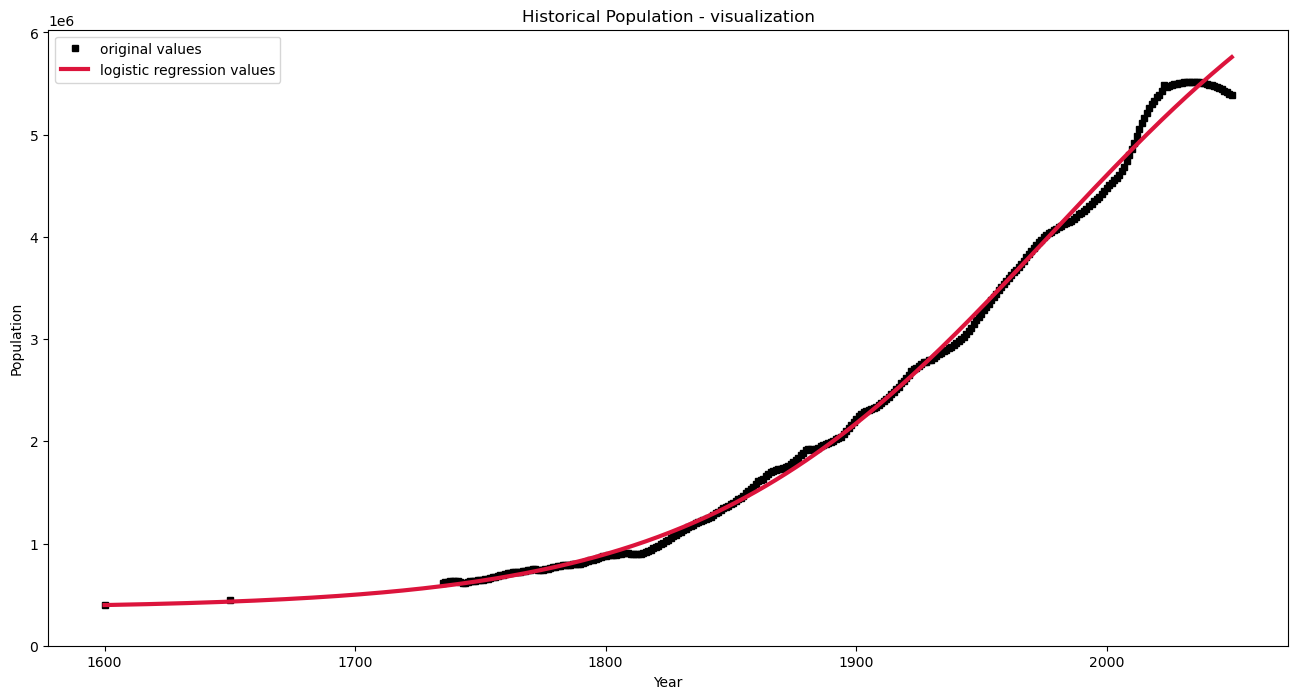

<Figure size 640x480 with 0 Axes>

In [8]:
# Set up the figure size for the plot
fig=plt.figure(figsize = (16,8))

# Plot the historical population data points as squares (‘s’ marker), 
# in black color.
plt.plot(
    historical_Pop.index, historical_Pop, 's', color = 'black', 
    markersize = 5, label = f'original values')

# Plot the logistic regression values as a crimson line.
plt.plot(
    pop_regression.index, pop_regression, color = 'crimson', lw = 3, 
    label = 'logistic regression values')

# Add a legend in the best location determined by matplotlib.
plt.legend(loc = 'best')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Historical Population - visualization')

# Set the lower bound of the y-axis to 0 to avoid negative population values.
plt.ylim(bottom=0)

# Display the plot.
plt.show()

# Save the plot as a JPEG image.
plt.savefig(
    directory_path / 
    'visualizations/baseline/model_inputs/calibration_validation_pop.jpeg',
    bbox_inches='tight')

### Persons per Dwelling

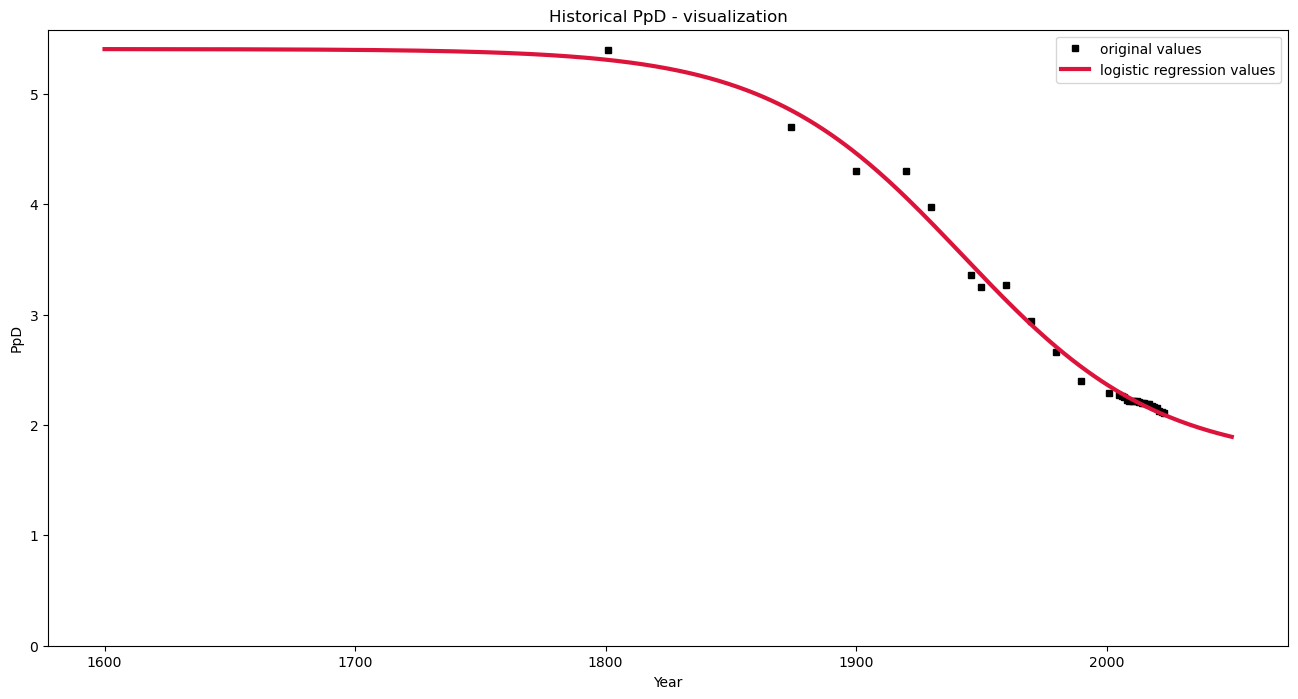

<Figure size 640x480 with 0 Axes>

In [9]:
# Set up the figure size for the plot.
plt.figure(figsize = (16,8))

# Plot the historical PpD data as black squares with a size of 5.
plt.plot(historical_PpD.index, historical_PpD, 's', color = 'black', 
         markersize = 5, label = f'original values')

# Plot the logistic regression of the PpD data as a crimson line.
plt.plot(PpD_regression.index, PpD_regression, color = 'crimson', 
         lw = 3, label = 'logistic regression values')

# Add a legend in the best possible position as determined by matplotlib.
plt.legend(loc = 'best')
plt.xlabel('Year')
plt.ylabel('PpD')

# Set the title of the plot.
plt.title('Historical PpD - visualization')

# Set the minimum limit of y-axis to 0 to avoid negative values which 
# are not possible in this context.
plt.ylim(bottom=0)

# Display the plot.
plt.show()

# Save the plot as a JPEG image.
plt.savefig(
    directory_path / 
    'visualizations/baseline/model_inputs/calibration_validation_ppd.jpeg', 
    bbox_inches='tight')

### Useful Floor Area per Dwelling

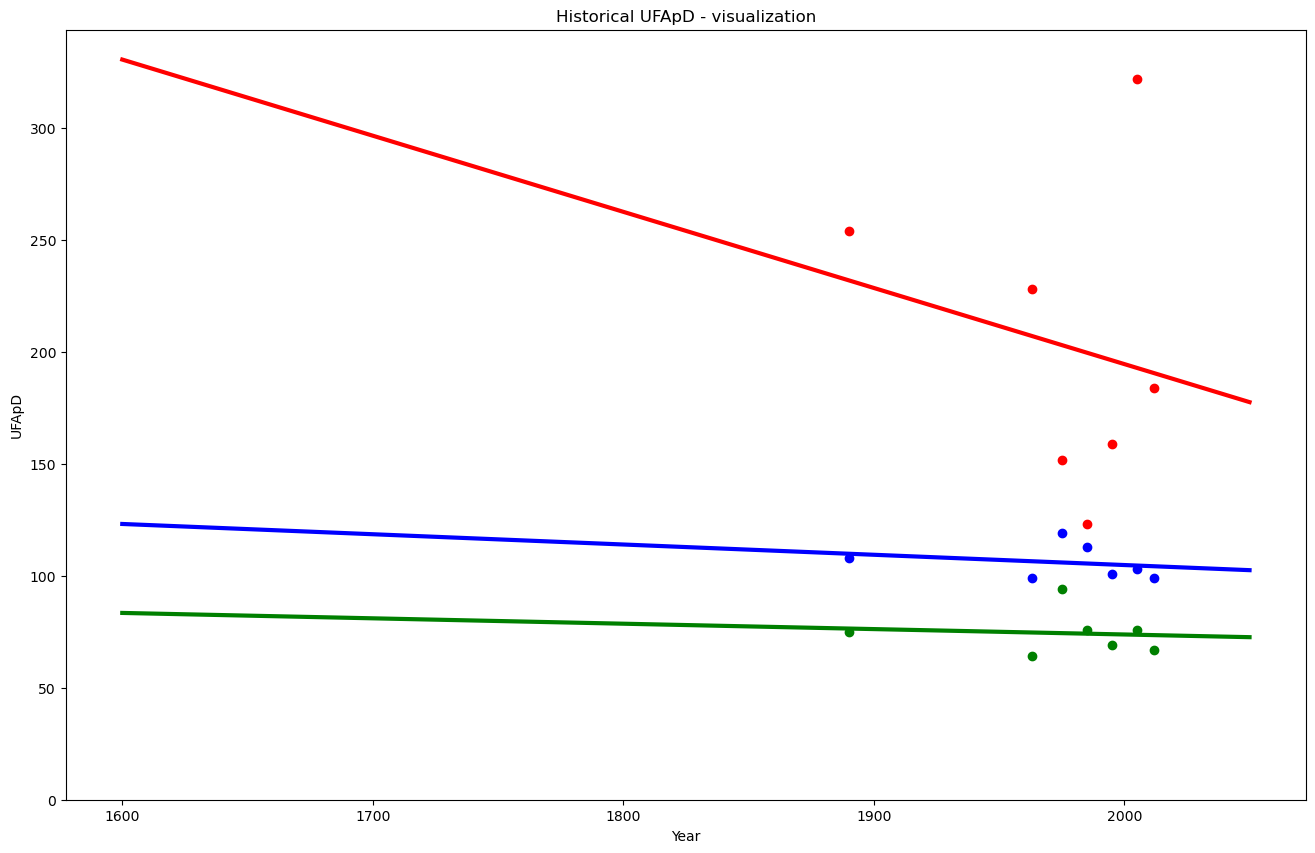

<Figure size 640x480 with 0 Axes>

In [10]:
# Set up the figure size for the plot.
plt.figure(figsize=(16,10))

# Scatter plots for historical UFApD of SFH, TH, AB in red, blue, and 
# green accordingly.
plt.scatter(
    historical_UFApD_SFH.index, historical_UFApD_SFH['UFApD'], c='red')
plt.scatter(
    historical_UFApD_TH.index, historical_UFApD_TH['UFApD'], c='blue')
plt.scatter(
    historical_UFApD_AB.index, historical_UFApD_AB['UFApD'], c='green')

# Plot UFApD data regression for SFH, TH, AB in red, blue, and green 
# accordingly.
plt.plot(
    UFApD_regression.index, UFApD_regression['UFApD SFH'], 
    color = 'red', lw = 3, label='SFH regression')
plt.plot(
    UFApD_regression.index, UFApD_regression['UFApD TH'], 
    color = 'blue', lw = 3, label='SFH regression')
plt.plot(
    UFApD_regression.index, UFApD_regression['UFApD AB'], 
    color = 'green', lw = 3, label='SFH regression')

plt.xlabel('Year')
plt.ylabel('UFApD')
plt.title('Historical UFApD - visualization')

# Setting the lower limit of y-axis to 0 to avoid showing negative values 
# which are not meaningful in this context.
plt.ylim(bottom=0)

# Display the plot.
plt.show()

# Save the plot as a JPEG image.
plt.savefig(
    directory_path / 
    'visualizations/baseline/model_inputs/calibration_validation_ufapd.jpeg', 
    bbox_inches='tight')

### Lifetime

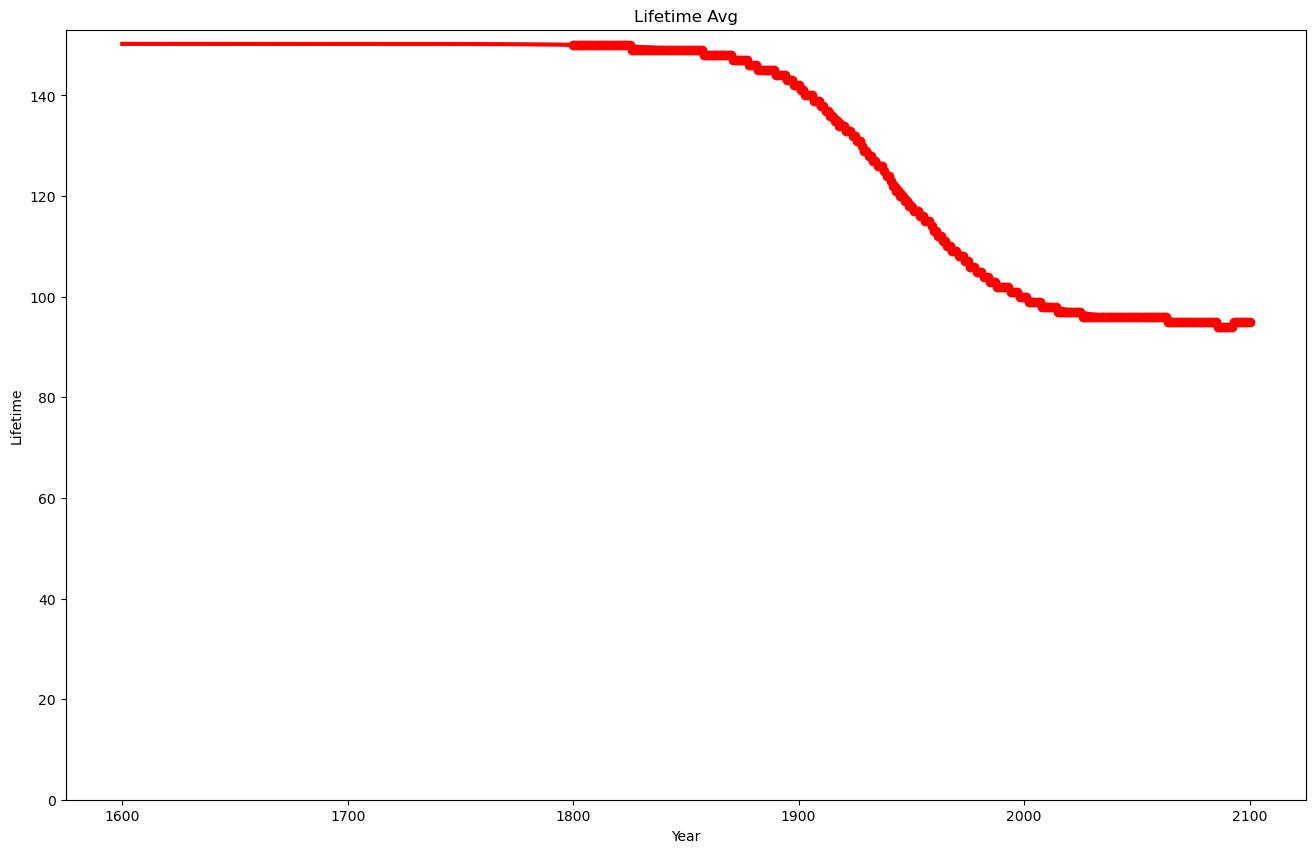

<Figure size 640x480 with 0 Axes>

In [11]:
# Set up the figure size for the plot.
plt.figure(figsize=(16,10))

# Create a scatter plot for historical average lifetime data in red.
plt.scatter(
    historical_lifetime.index, historical_lifetime['Average lifetime'], 
    c='red')

# Add a line plot for the regression of average lifetime data, using a red line.
plt.plot(
    lifetime_regression.index, lifetime_regression['Avg_lifetime'], 
    color = 'red', lw = 3, label='SFH regression')
plt.xlabel('Year')
plt.ylabel('Lifetime')
plt.title('Lifetime Avg')

# Set the lower limit of the y-axis to 0 to ensure the scale starts from zero.
plt.ylim(bottom=0)
plt.show()

# Save the plot as a JPEG image.
plt.savefig(
    directory_path / 
    'visualizations/baseline/model_inputs/calibration_validation_lifetime.jpeg', 
    bbox_inches='tight')

### Standard deviation of the lifetime data.

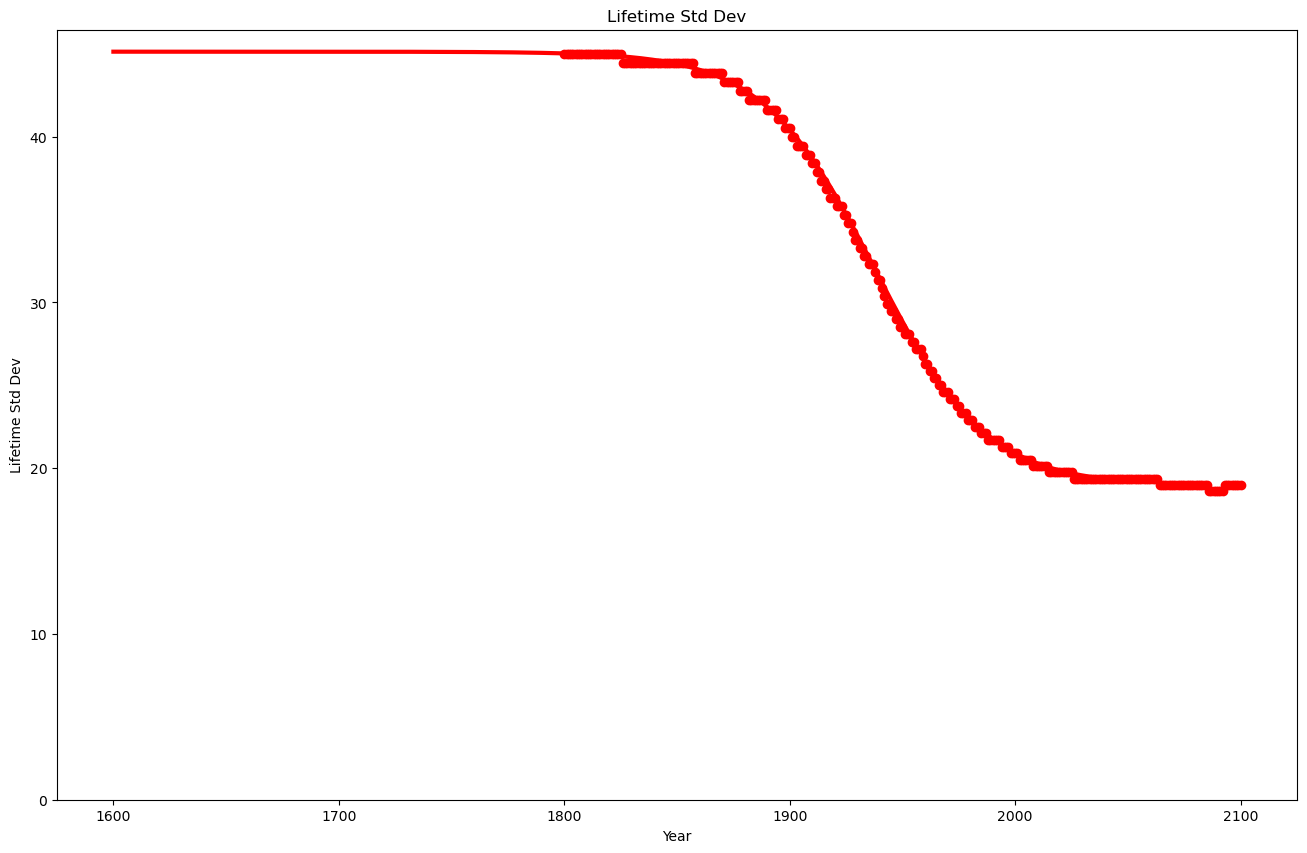

<Figure size 640x480 with 0 Axes>

In [12]:
# Lifetime std dev

plt.figure(figsize=(16,10))

# Create a scatter plot for historical standard deviation data in red.
plt.scatter(
    historical_lifetime_std_dev.index, 
    historical_lifetime_std_dev['std_dev'], c='red')

# Add a line plot for the regression of standard deviation data, using 
# a red line.
plt.plot(
    lifetime_std_dev_regression.index, 
    lifetime_std_dev_regression['std_dev'], color = 'red', lw = 3, 
    label='SFH regression')
plt.xlabel('Year')
plt.ylabel('Lifetime Std Dev')
plt.title('Lifetime Std Dev')

# Set the lower limit of the y-axis to 0 to ensure the scale starts from zero.
plt.ylim(bottom=0)

# Display the plot.
plt.show()

# Save the plot as a JPEG image.
plt.savefig(
    directory_path / 
    'visualizations/baseline/model_inputs/calibration_validation_lifetime_std_dev.jpeg', 
    bbox_inches='tight')

## Plotting model outputs

### Plotting the SFH total stock

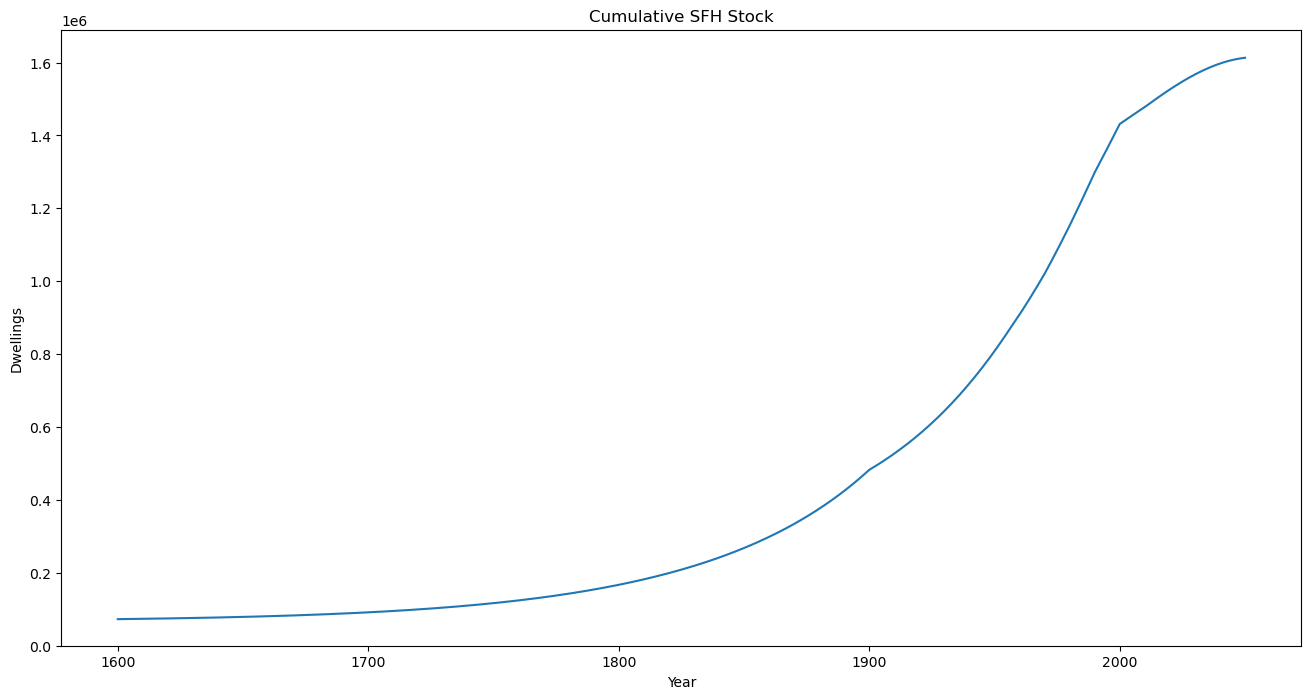

In [13]:
# Set up the figure size for the plot.
plt.figure(figsize=(16, 8))

# Plot the total SFH stock data from 1600 to 2050.
plt.plot(np.arange(1600, 2051), s_SFH_df)
plt.title('Cumulative SFH Stock')
plt.xlabel('Year')
plt.ylabel('Dwellings')

# Set the lower limit of the y-axis to 0 to ensure the scale starts from zero.
plt.ylim(bottom=0)

# Save the plot as a JPEG image.
plt.savefig(
    directory_path / 
    'visualizations/baseline/model_outputs/total_stock_sfh.jpeg', 
    bbox_inches='tight')

### Plotting the TH total stock

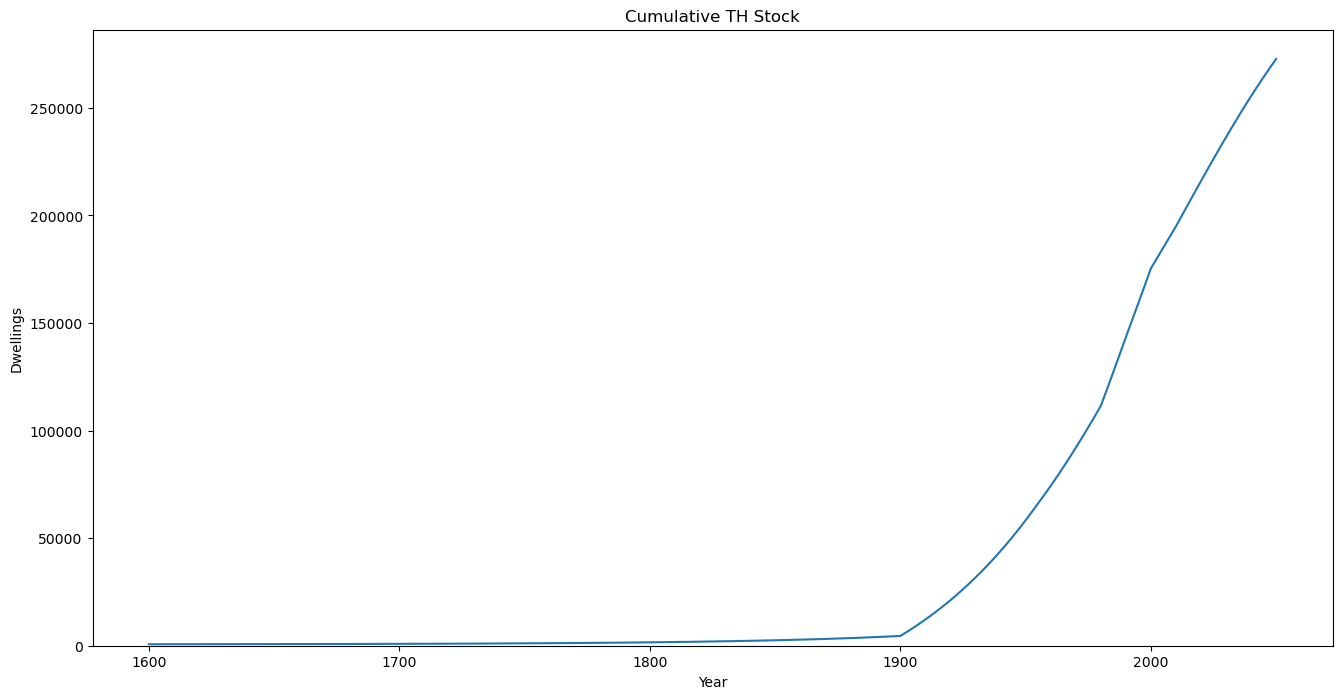

In [14]:
# Set up the figure size for the plot.
plt.figure(figsize=(16, 8))

# Plot the total TH stock data from 1600 to 2050.
plt.plot(np.arange(1600, 2051), s_TH_df)
plt.title('Cumulative TH Stock')
plt.xlabel('Year')
plt.ylabel('Dwellings')

# Set the lower limit of the y-axis to 0 to ensure the scale starts from zero.
plt.ylim(bottom=0)

# Save the plot as a JPEG image.
plt.savefig(
    directory_path / 
    'visualizations/baseline/model_outputs/total_stock_th.jpeg', 
    bbox_inches='tight')

### Plotting the AB total stock

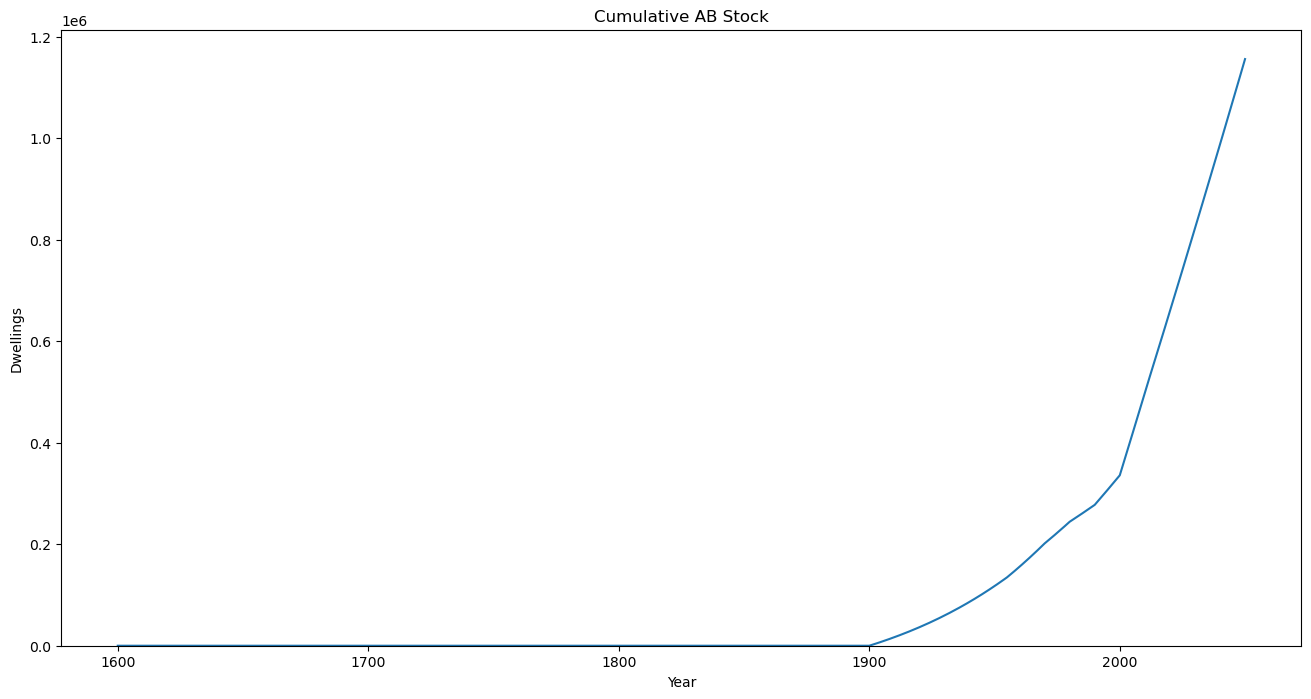

In [15]:
# Set up the figure size for the plot.
plt.figure(figsize=(16, 8))

# Plot the total AB stock data from 1600 to 2050.
plt.plot(np.arange(1600, 2051), s_AB_df)
plt.title('Cumulative AB Stock')
plt.xlabel('Year')
plt.ylabel('Dwellings')

# Set the lower limit of the y-axis to 0 to ensure the scale starts from zero.
plt.ylim(bottom=0)

# Save the plot as a JPEG image.
plt.savefig(
    directory_path / 
    'visualizations/baseline/model_outputs/total_stock_ab.jpeg', 
    bbox_inches='tight')

### Plotting the SFH stock by TABULA cohort

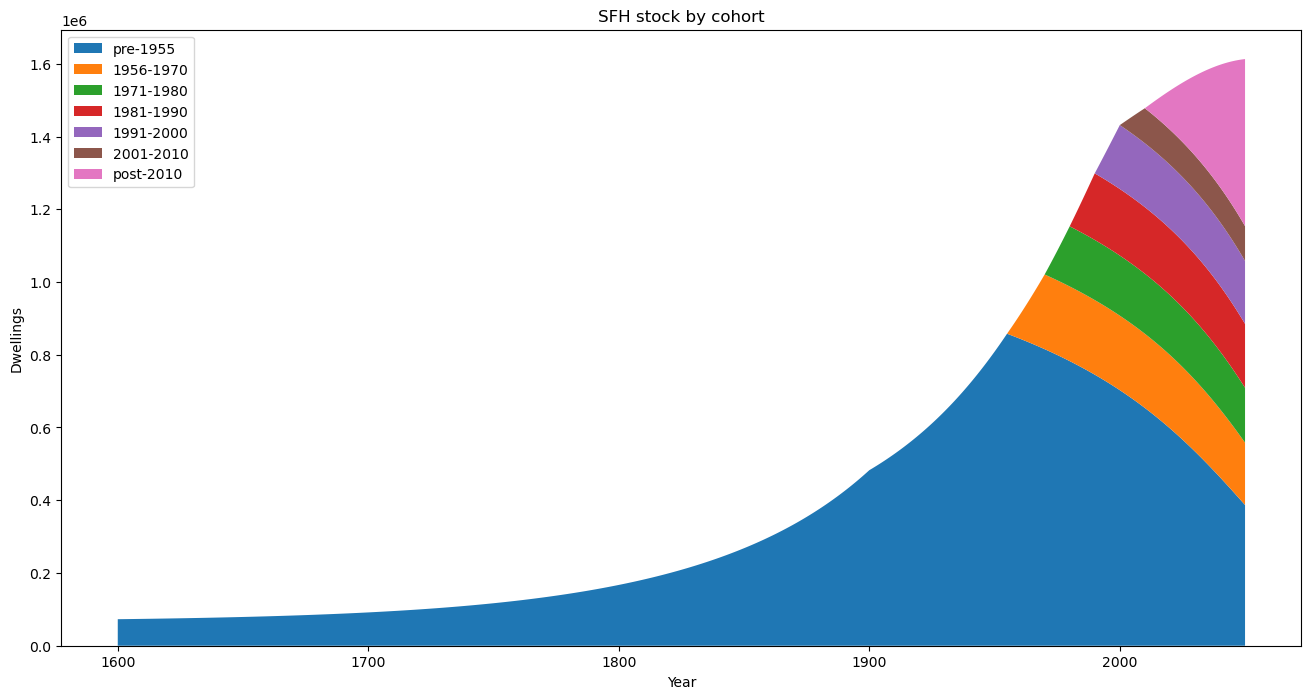

In [16]:
# Set up the figure size for the plot.
plt.figure(figsize=(16, 8))

# Generate a stack plot representing the SFH stock across different 
# construction cohorts from 1600 to 2050.
plt.stackplot(
    np.arange(1600, 2051), SFH_stock_by_tabula_cohort.loc[:,'pre-1955'], 
    SFH_stock_by_tabula_cohort.loc[:,'1956-1970'],
    SFH_stock_by_tabula_cohort.loc[:,'1971-1980'],
    SFH_stock_by_tabula_cohort.loc[:,'1981-1990'],
    SFH_stock_by_tabula_cohort.loc[:,'1991-2000'],
    SFH_stock_by_tabula_cohort.loc[:,'2001-2010'],
    SFH_stock_by_tabula_cohort.loc[:,'post-2010'],
    labels=[
        'pre-1955', '1956-1970', '1971-1980', '1981-1990', '1991-2000', 
        '2001-2010', 'post-2010']
    )

plt.title('SFH stock by cohort')
plt.xlabel('Year')
plt.legend(loc='upper left')
plt.ylabel('Dwellings')

# Set the lower limit of the y-axis to 0 to ensure the scale starts from zero.
plt.ylim(bottom=0)

# Save the plot as a JPEG image.
plt.savefig(
    directory_path / 
    'visualizations/baseline/model_outputs/stock_by_cohort_sfh.jpeg', 
    bbox_inches='tight')

### Plotting the TH stock by TABULA cohort

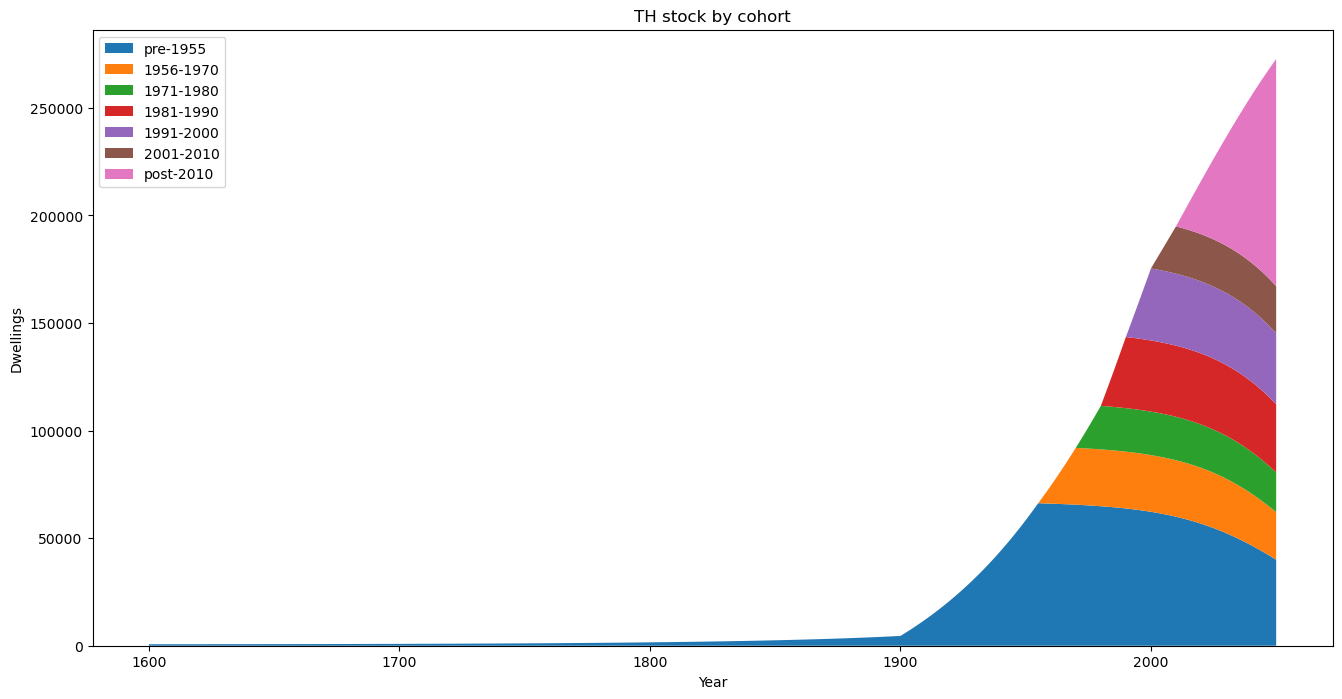

In [17]:
# Set up the figure size for the plot.
plt.figure(figsize=(16, 8))

# Generate a stack plot representing the TH stock across different 
# construction cohorts from 1600 to 2050.
plt.stackplot(
    np.arange(1600, 2051), TH_stock_by_tabula_cohort.loc[:,'pre-1955'], 
    TH_stock_by_tabula_cohort.loc[:,'1956-1970'],
    TH_stock_by_tabula_cohort.loc[:,'1971-1980'],
    TH_stock_by_tabula_cohort.loc[:,'1981-1990'],
    TH_stock_by_tabula_cohort.loc[:,'1991-2000'],
    TH_stock_by_tabula_cohort.loc[:,'2001-2010'],
    TH_stock_by_tabula_cohort.loc[:,'post-2010'],
    labels=[
        'pre-1955', '1956-1970', '1971-1980', '1981-1990', '1991-2000', 
        '2001-2010', 'post-2010']
    )

plt.title('TH stock by cohort')
plt.xlabel('Year')
plt.legend(loc='upper left')
plt.ylabel('Dwellings')

# Set the lower limit of the y-axis to 0 to ensure the scale starts from zero.
plt.ylim(bottom=0)

# Save the plot as a JPEG image.
plt.savefig(
    directory_path / 
    'visualizations/baseline/model_outputs/stock_by_cohort_th.jpeg',
    bbox_inches='tight')

### Plotting the AB stock by TABULA cohort

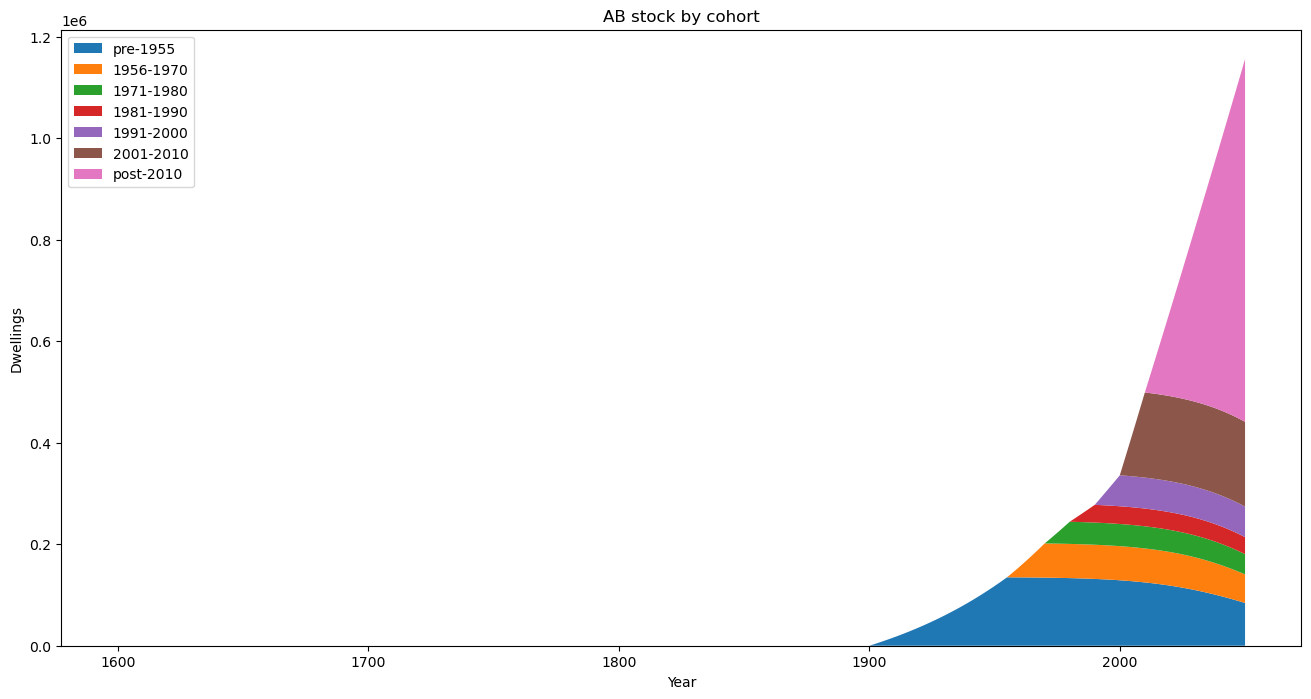

In [18]:
# Set up the figure size for the plot.
plt.figure(figsize=(16, 8))

# Generate a stack plot representing the AB stock across different 
# construction cohorts from 1600 to 2050.
plt.stackplot(
    np.arange(1600, 2051), AB_stock_by_tabula_cohort.loc[:,'pre-1955'], 
    AB_stock_by_tabula_cohort.loc[:,'1956-1970'],
    AB_stock_by_tabula_cohort.loc[:,'1971-1980'],
    AB_stock_by_tabula_cohort.loc[:,'1981-1990'],
    AB_stock_by_tabula_cohort.loc[:,'1991-2000'],
    AB_stock_by_tabula_cohort.loc[:,'2001-2010'],
    AB_stock_by_tabula_cohort.loc[:,'post-2010'],
    labels=[
        'pre-1955', '1956-1970', '1971-1980', '1981-1990', '1991-2000', 
        '2001-2010', 'post-2010']
    )

plt.title('AB stock by cohort')
plt.xlabel('Year')
plt.legend(loc='upper left')
plt.ylabel('Dwellings')

# Set the lower limit of the y-axis to 0 to ensure the scale starts from zero.
plt.ylim(bottom=0)

# Save the plot as a JPEG image.
plt.savefig(
    directory_path / 
    'visualizations/baseline/model_outputs/stock_by_cohort_ab.jpeg', 
    bbox_inches='tight')

### Plotting total stock change

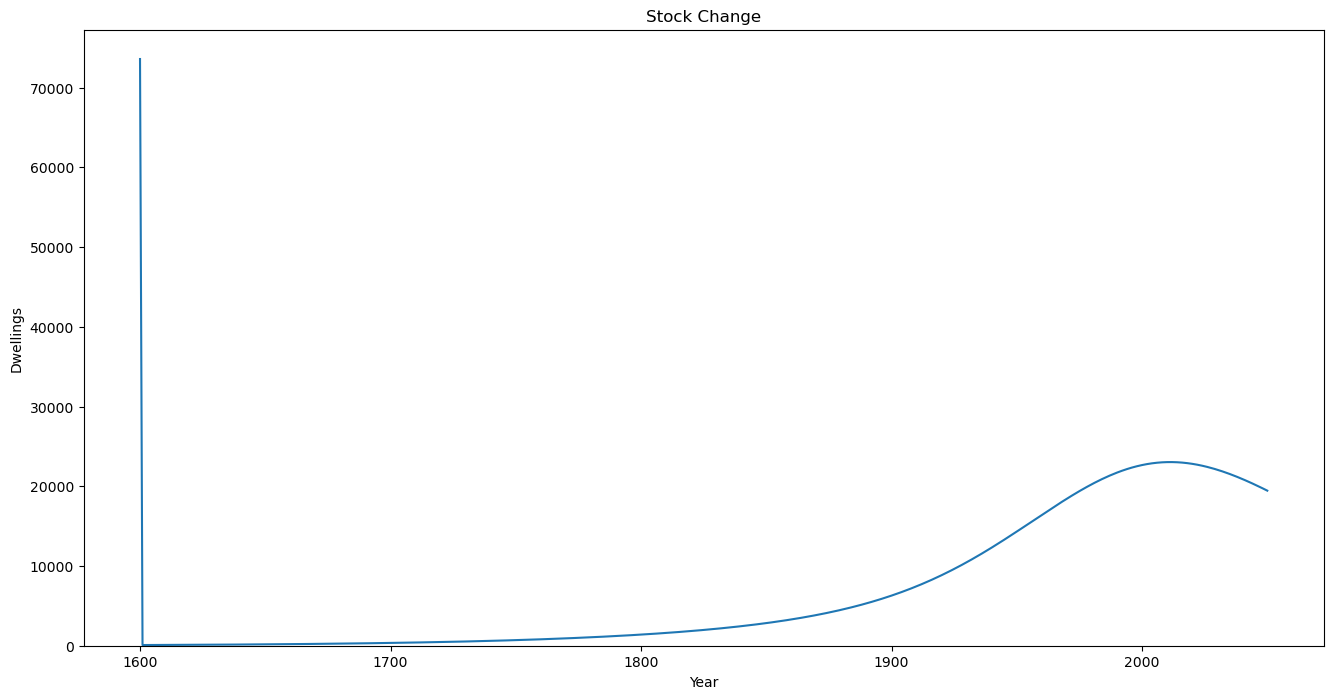

In [19]:
# Set up the figure size for the plot.
plt.figure(figsize=(16, 8))

# Plot the cumulative sum of stock changes across all dwelling types 
# for each year.
plt.plot(np.arange(1600, 2051), stock_change_total.sum(axis=1))
plt.title('Stock Change')
plt.xlabel('Year')
plt.ylabel('Dwellings')

# Set the lower limit of the y-axis to 0 to ensure the scale starts from zero.
plt.ylim(bottom=0)

# Save the plot as a JPEG image.
plt.savefig(
    directory_path / 
    'visualizations/baseline/model_outputs/stock_change.jpeg', 
    bbox_inches='tight')

### Plotting stock by dwelling type

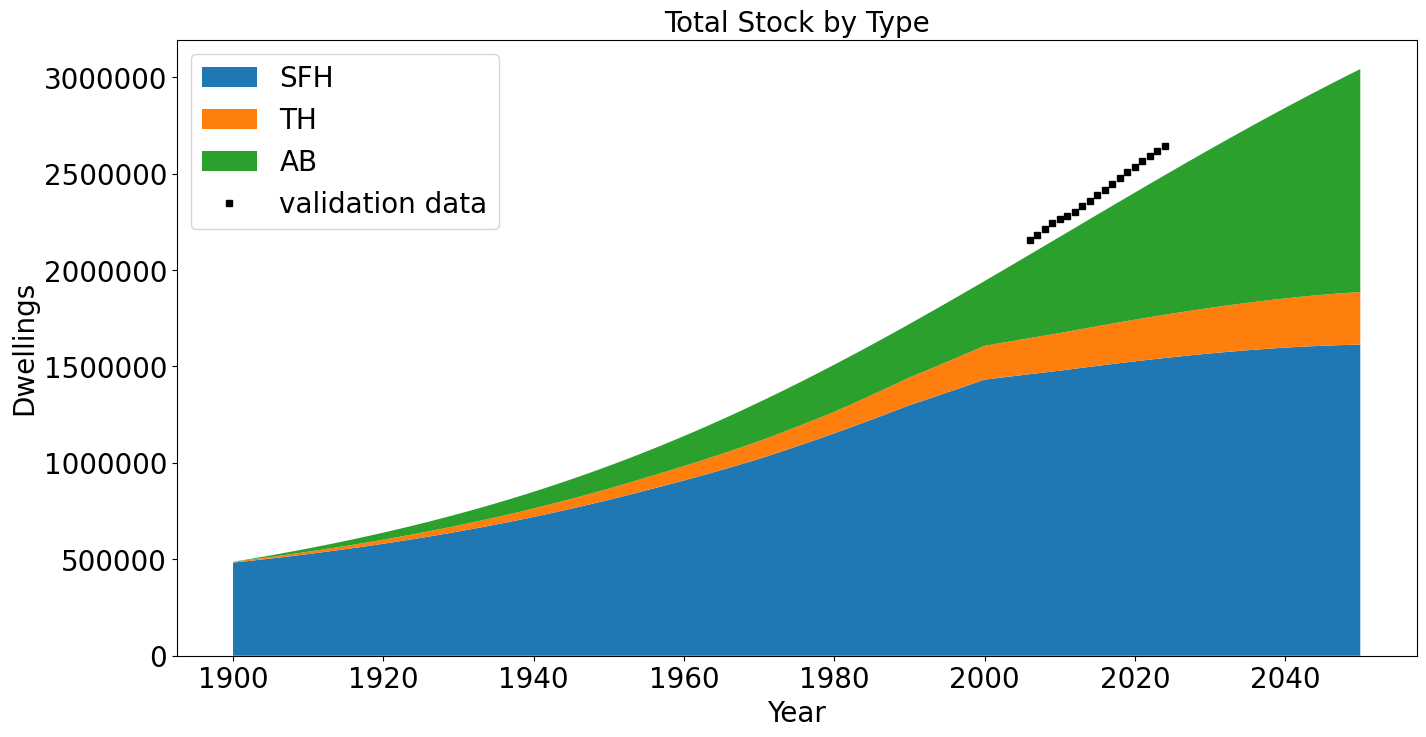

In [76]:
# Set up the figure size for the plot.
plt.figure(figsize=(16, 8))

# Create a stack plot of SFH, TH, and AB dwelling types over the 
# specified time range.
plt.stackplot(
    np.arange(1900, 2051), 
    s_SFH_df.loc['1900':'2050'].sum(axis=1),
    s_TH_df.loc['1900':'2050'].sum(axis=1),
    s_AB_df.loc['1900':'2050'].sum(axis=1),
    labels=['SFH', 'TH', 'AB']
    )

# Calculate the total stock from validation data across all dwelling types.
total_stock_validation = stock_validation.loc[
    :,'SFH'] + stock_validation.loc[:,'TH'] + stock_validation.loc[
        :,'AB']

# Plot validation data points to compare with the stacked area plot, 
# enhancing the plot's utility for validation purposes.
plt.plot(
    total_stock_validation.index, total_stock_validation, 's', 
    color = 'black', markersize = 5, label = f'validation data')

# Enhance plot aesthetics with titles, labels, and ticks, making it 
# informative and accessible.
plt.title('Total Stock by Type', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.legend(loc='upper left', fontsize=20)
plt.ylabel('Dwellings', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ticklabel_format(axis='y', style='plain')
plt.ylim(bottom=0)

# Save the plot as a JPEG file.
plt.savefig(
    directory_path / 
    'visualizations/baseline/model_outputs/total_stock_by_type.jpeg', 
    bbox_inches='tight')

### Plotting total stock by TABULA cohort

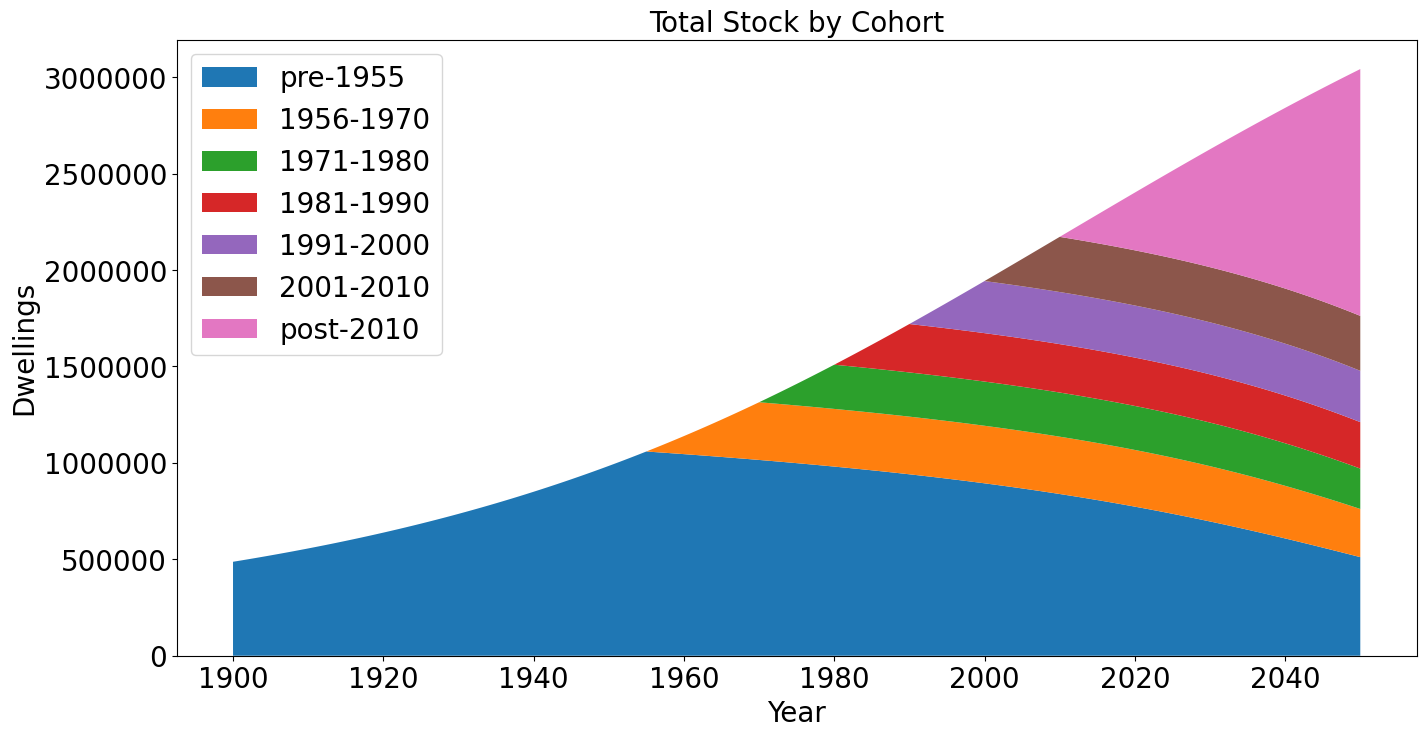

In [127]:
# Set up the figure size for the plot.
plt.figure(figsize=(16, 8))

# Create a stack plot representing the total stock from different dwelling 
# cohorts over the years 1900 to 2050.
plt.stackplot(
    np.arange(1900, 2051), 
    total_stock_by_tabula_cohort.loc['1900':'2050','pre-1955'], 
    total_stock_by_tabula_cohort.loc['1900':'2050','1956-1970'],
    total_stock_by_tabula_cohort.loc['1900':'2050','1971-1980'],
    total_stock_by_tabula_cohort.loc['1900':'2050','1981-1990'],
    total_stock_by_tabula_cohort.loc['1900':'2050','1991-2000'],
    total_stock_by_tabula_cohort.loc['1900':'2050','2001-2010'],
    total_stock_by_tabula_cohort.loc['1900':'2050','post-2010'],
    labels=[
        'pre-1955', '1956-1970', '1971-1980', '1981-1990', '1991-2000', 
        '2001-2010', 'post-2010']
    )

# Enhance plot aesthetics with titles, labels, and ticks, making it 
# informative and accessible.
plt.title('Total Stock by Cohort', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.legend(loc='upper left', fontsize=20)
plt.ylabel('Dwellings', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ticklabel_format(axis='y', style='plain')

# Save the plot as a JPEG file.
plt.savefig(
    directory_path / 
    'visualizations/baseline/model_outputs/total_stock_by_cohort.jpeg', 
    bbox_inches='tight')

### Plotting inflow by type

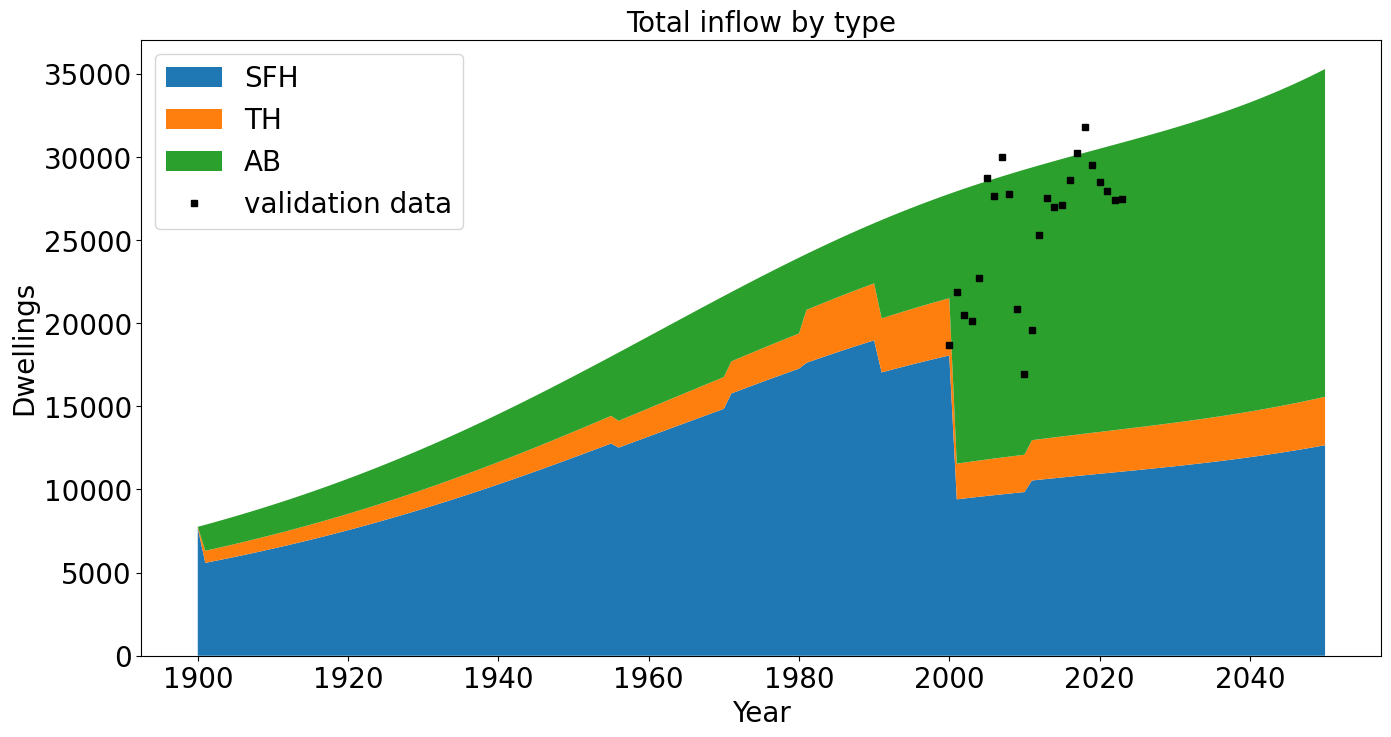

In [132]:
# Set up the figure size for the plot.
plt.figure(figsize=(16, 8))

# Create a stack plot to display inflows of different dwelling types 
# over the years.
plt.stackplot(
    np.arange(1900, 2051), 
    i_SFH.loc['1900':'2050'].sum(axis=1), 
    i_TH.loc['1900':'2050'].sum(axis=1),
    i_AB.loc['1900':'2050'].sum(axis=1),
    labels=[
        'SFH', 'TH', 'AB']
    )

# Aggregate the validation data for total inflow across all dwelling types 
# and adjust the index for consistent plotting.
total_inflow_validation = inflow_validation.loc[
    :,'SFH'] + inflow_validation.loc[:,'TH'] + inflow_validation.loc[
        :,'AB']
total_inflow_validation.index = total_inflow_validation.index.astype(
    int) 

# Plot the validation data as a series of points for comparison and 
# validation against the modeled (calibrated) data.
plt.plot(total_inflow_validation.index, total_inflow_validation, 's', 
          color = 'black', markersize = 5, label = f'validation data')

# Enhance the plot with titles, labels, legends, and ticks to improve 
# readability and provide detailed context.
plt.title('Total inflow by type', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.legend(loc='upper left', fontsize=20)
plt.ylabel('Dwellings', fontsize=20)


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(bottom=0)

# Save the plot as a JPEG file.
plt.savefig(
    directory_path / 
    'visualizations/baseline/model_outputs/total_inflow_by_type.jpeg', 
    bbox_inches='tight')

In [91]:
# Display the index of the i_SFH DataFrame, which consists of an 
# Int64Index from the years 1600 to 2050.
i_SFH.index

Int64Index([1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609,
            ...
            2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050],
           dtype='int64', length=451)

In [93]:
# Display the index of the inflow_validation DataFrame, which consists of an 
# Index object containing string representations of years from 2000 to 2023.
inflow_validation.index

Index(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype='object', name='Year')

### Plotting the total outflow

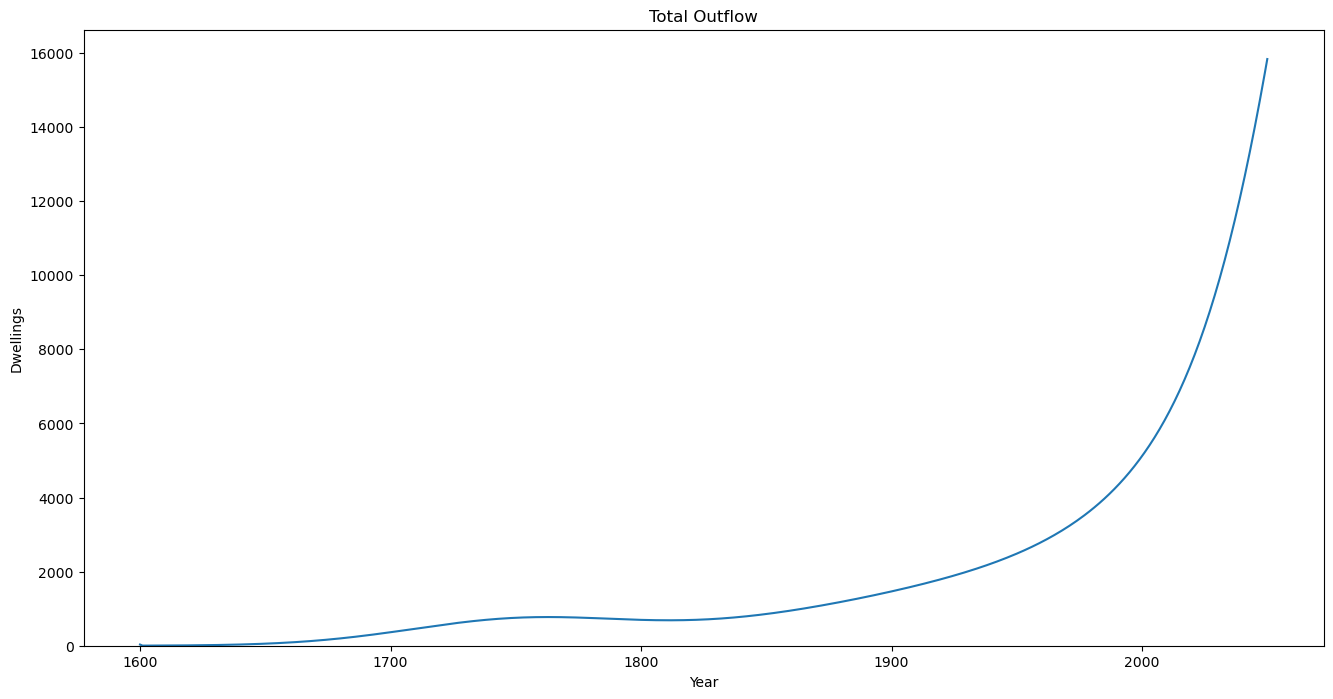

In [23]:
# This plotting script visualizes the total outflow of dwellings from 
# 1600 to 2051.
# Set up the figure size for the plot.
plt.figure(figsize=(16, 8))
plt.plot(np.arange(1600, 2051), o_total.sum(axis=1))
plt.title('Total Outflow')
plt.xlabel('Year')
plt.ylabel('Dwellings')
plt.ylim(bottom=0)
plt.savefig(
    directory_path / 
    'visualizations/baseline/model_outputs/total_outflow.jpeg', 
    bbox_inches='tight')

### Plotting the total inflow

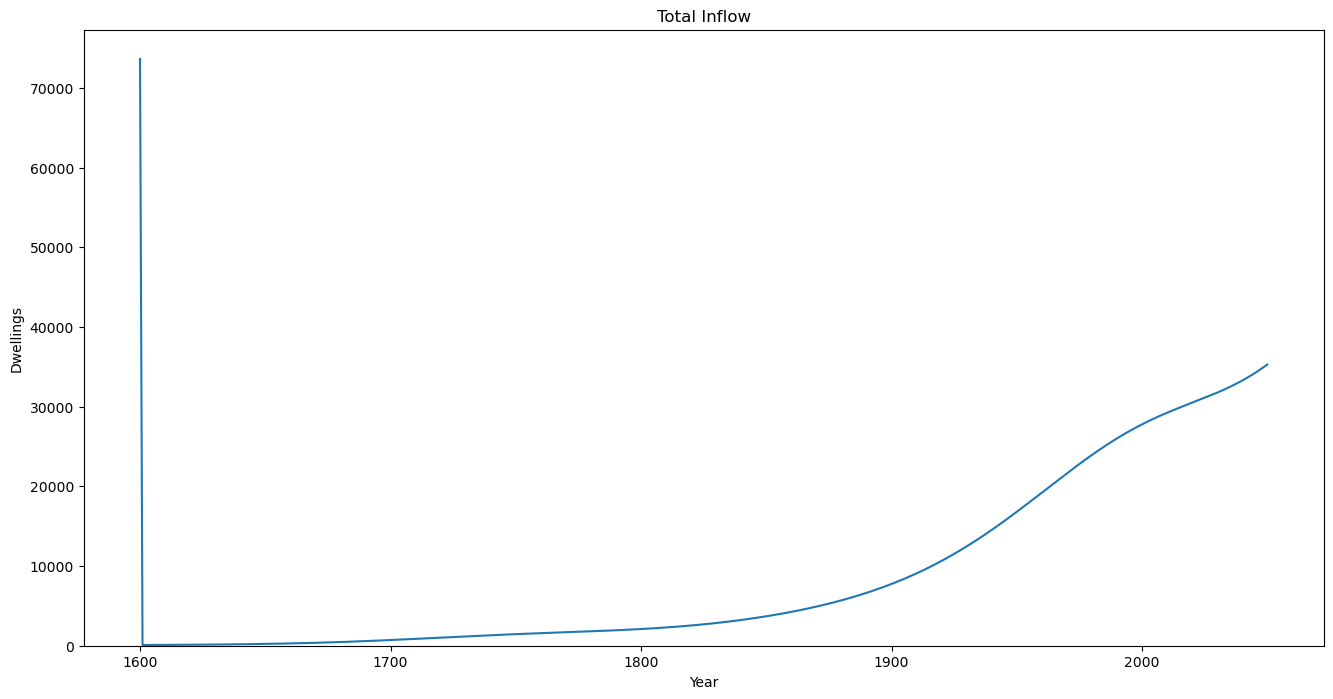

In [24]:
# This script creates a plot to visualize the total inflow of dwellings 
# from 1600 to 2050.
plt.figure(figsize=(16, 8))
plt.plot(np.arange(1600, 2051), i_total)
plt.title('Total Inflow')
plt.xlabel('Year')
plt.ylabel('Dwellings')
plt.ylim(bottom=0)
plt.savefig(
    directory_path / 
    'visualizations/baseline/model_outputs/total_inflow.jpeg', 
    bbox_inches='tight')

### Plotting the SFH UFA total stock

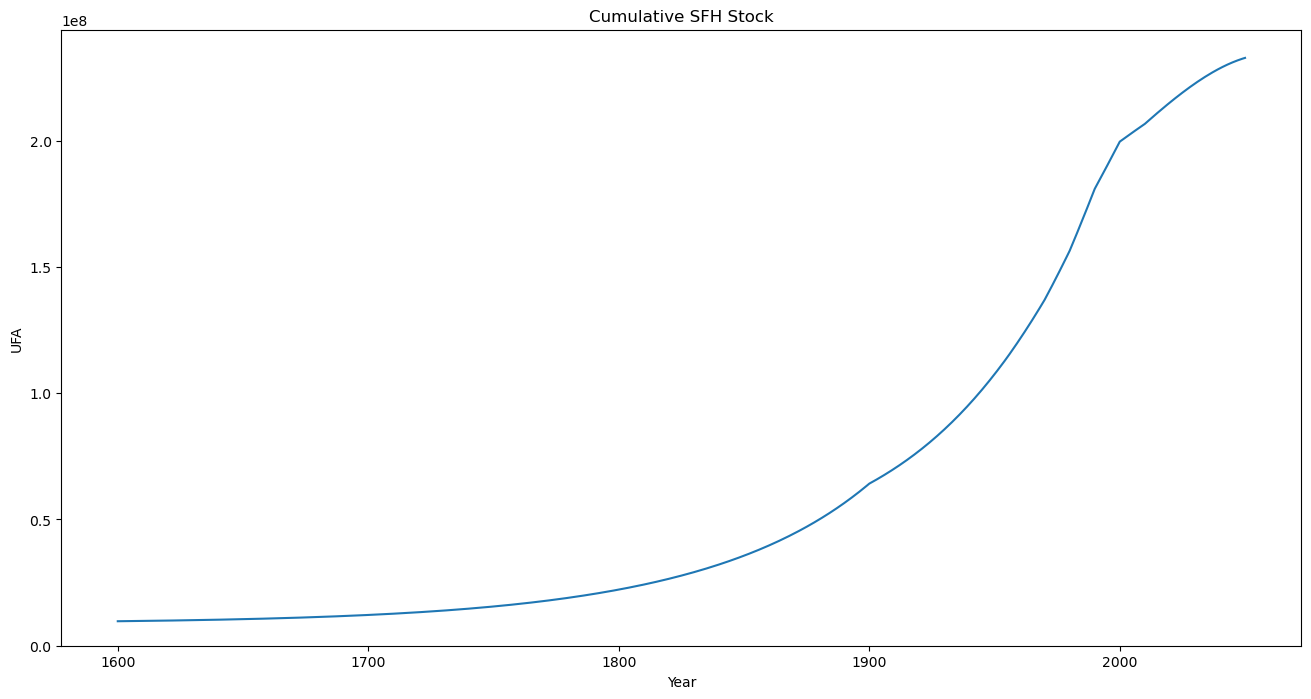

In [25]:
# This script creates a plot to visualize the cumulative stock of 
# Useful Floor Area (UFA) for Single Family Homes (SFH) from the year 
# 1600 to 2050.
plt.figure(figsize=(16, 8))
plt.plot(np.arange(1600, 2051), s_UFA_c_SFH_df.sum(axis=1))
plt.title('Cumulative SFH Stock')
plt.xlabel('Year')
plt.ylabel('UFA')
plt.ylim(bottom=0)
plt.savefig(
    directory_path / 
    'visualizations/baseline/model_outputs/total_stock_ufa_sfh.jpeg', 
    bbox_inches='tight')

### Plotting the TH UFA total stock

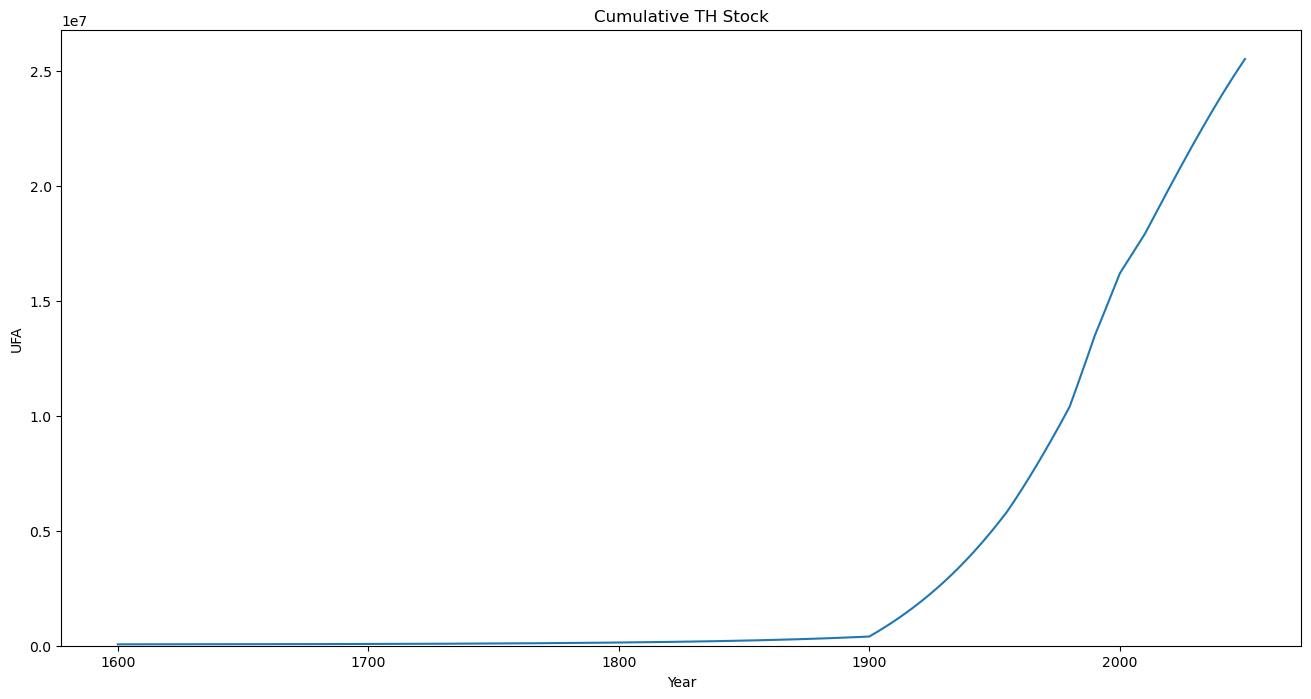

In [26]:
# This script generates a plot of the cumulative stock of 
# Useful Floor Area (UFA) for Terraced Houses (TH) spanning from 1600 to 2050.
plt.figure(figsize=(16, 8))
plt.plot(np.arange(1600, 2051), s_UFA_c_TH_df.sum(axis=1))
plt.title('Cumulative TH Stock')
plt.xlabel('Year')
plt.ylabel('UFA')
plt.ylim(bottom=0)
plt.savefig(
    directory_path / 
    'visualizations/baseline/model_outputs/total_stock_ufa_th.jpeg', 
    bbox_inches='tight')

### Plotting the AB UFA total stock

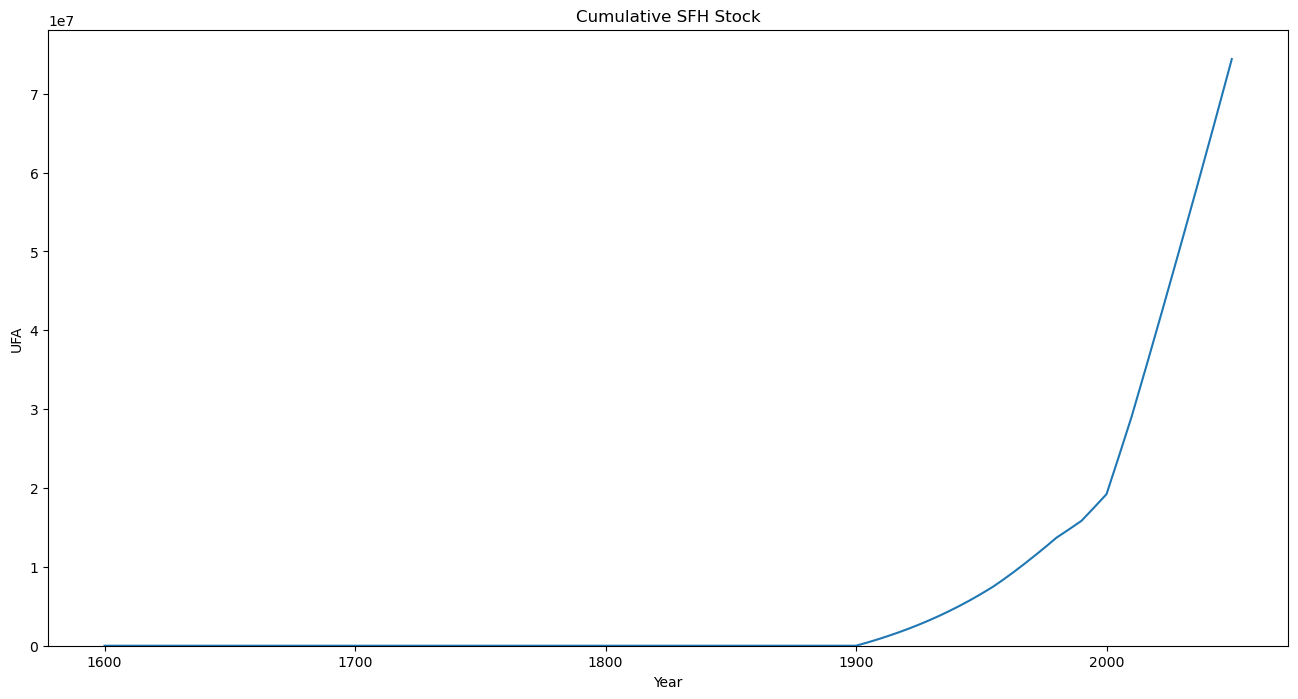

In [27]:
# This script generates a plot of the cumulative stock of 
# Useful Floor Area (UFA) for Single Family Homes (SFH) spanning from 
# 1600 to 2050.
plt.figure(figsize=(16, 8))
plt.plot(np.arange(1600, 2051), s_UFA_c_AB_df.sum(axis=1))
plt.title('Cumulative SFH Stock')
plt.xlabel('Year')
plt.ylabel('UFA')
plt.ylim(bottom=0)
plt.savefig(
    directory_path / 
    'visualizations/baseline/model_outputs/total_stock_ufa_ab.jpeg', 
    bbox_inches='tight')

### Plotting the SFH stock by tabula cohort

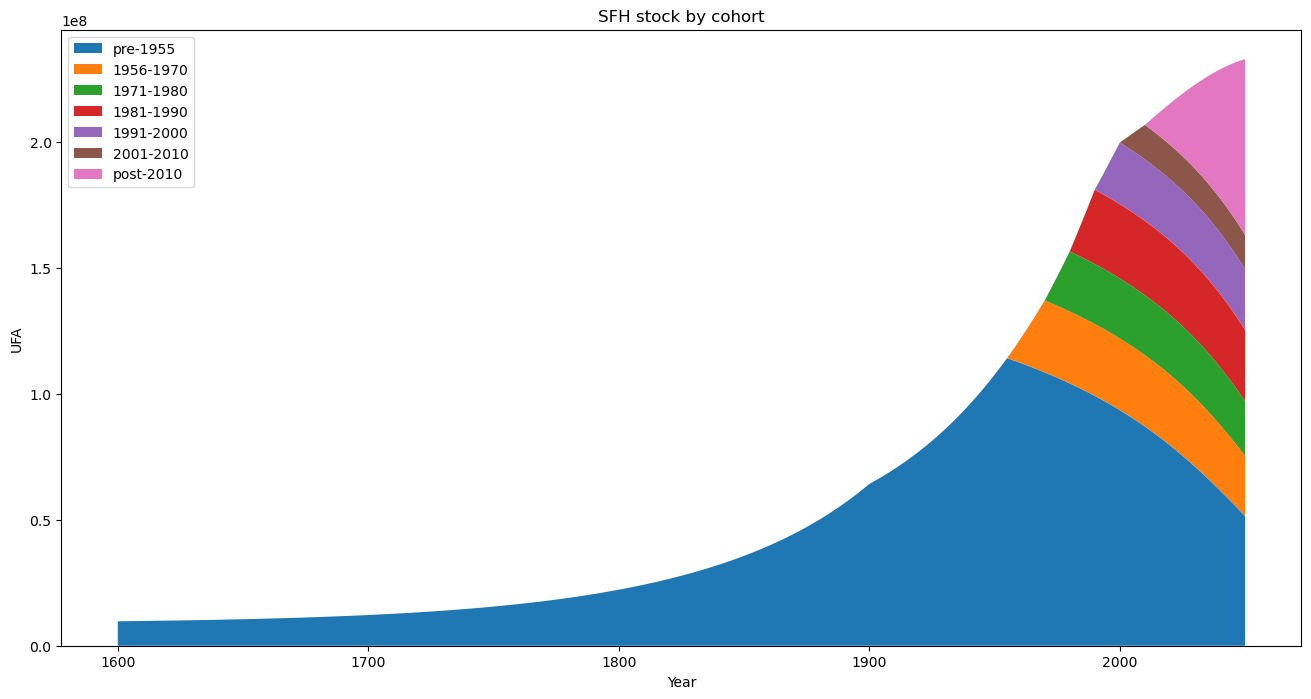

In [28]:
# This script visualizes the distribution of Useful Floor Area (UFA) stock 
# for Single Family Homes (SFH) by tabula cohort from 1600 to 2050.
plt.figure(figsize=(16, 8))

# Create a stacked area plot showing the distribution of UFA stock for 
# SFH from 1600 to 2050.
# Each segment of the stack represents UFA stock from different construction 
# periods or cohorts.
plt.stackplot(
    np.arange(1600, 2051), 
    SFH_UFA_stock_by_tabula_cohort.loc[:,'pre-1955'], 
    SFH_UFA_stock_by_tabula_cohort.loc[:,'1956-1970'],
    SFH_UFA_stock_by_tabula_cohort.loc[:,'1971-1980'],
    SFH_UFA_stock_by_tabula_cohort.loc[:,'1981-1990'],
    SFH_UFA_stock_by_tabula_cohort.loc[:,'1991-2000'],
    SFH_UFA_stock_by_tabula_cohort.loc[:,'2001-2010'],
    SFH_UFA_stock_by_tabula_cohort.loc[:,'post-2010'],
    labels=[
        'pre-1955', '1956-1970', '1971-1980', '1981-1990', '1991-2000', 
        '2001-2010', 'post-2010']
    )

plt.title('SFH stock by cohort')
plt.xlabel('Year')
plt.legend(loc='upper left')
plt.ylabel('UFA')
plt.ylim(bottom=0)
plt.savefig(
    directory_path / 
    'visualizations/baseline/model_outputs/sfh_ufa_stock_by_cohort.jpeg', 
    bbox_inches='tight')

### Plotting the TH stock by tabula cohort

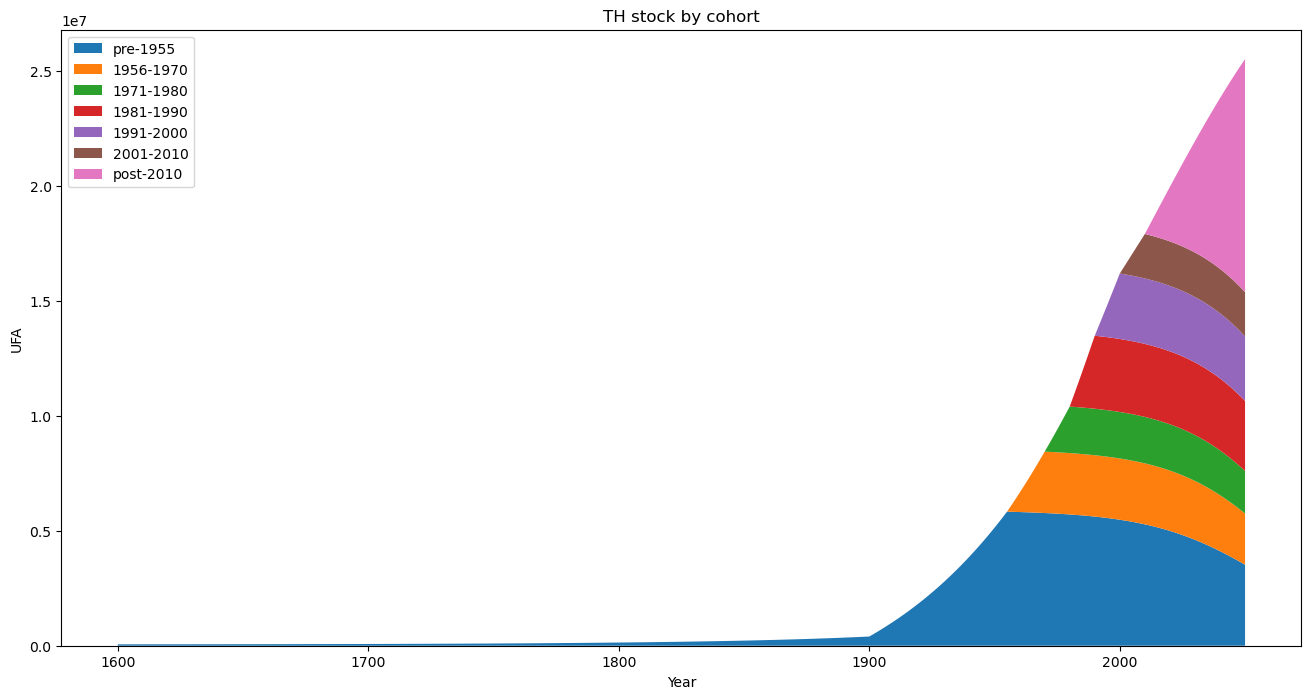

In [29]:
# This script visualizes the distribution of Useful Floor Area (UFA) stock 
# for Terraced Houses (TH) by tabula cohort from 1600 to 2050.
plt.figure(figsize=(16, 8))

# Create a stacked area plot showing the distribution of UFA stock for 
# TH from 1600 to 2050.
# Each segment of the stack represents UFA stock from different construction 
# periods or cohorts.
plt.stackplot(
    np.arange(1600, 2051), 
    TH_UFA_stock_by_tabula_cohort.loc[:,'pre-1955'], 
    TH_UFA_stock_by_tabula_cohort.loc[:,'1956-1970'],
    TH_UFA_stock_by_tabula_cohort.loc[:,'1971-1980'],
    TH_UFA_stock_by_tabula_cohort.loc[:,'1981-1990'],
    TH_UFA_stock_by_tabula_cohort.loc[:,'1991-2000'],
    TH_UFA_stock_by_tabula_cohort.loc[:,'2001-2010'],
    TH_UFA_stock_by_tabula_cohort.loc[:,'post-2010'],
    labels=[
        'pre-1955', '1956-1970', '1971-1980', '1981-1990', '1991-2000', 
        '2001-2010', 'post-2010']
    )

plt.title('TH stock by cohort')
plt.xlabel('Year')
plt.legend(loc='upper left')
plt.ylabel('UFA')
plt.ylim(bottom=0)
plt.savefig(
    directory_path / 
    'visualizations/baseline/model_outputs/th_ufa_stock_by_cohort.jpeg', 
    bbox_inches='tight')

### Plotting the AB stock by tabula cohort

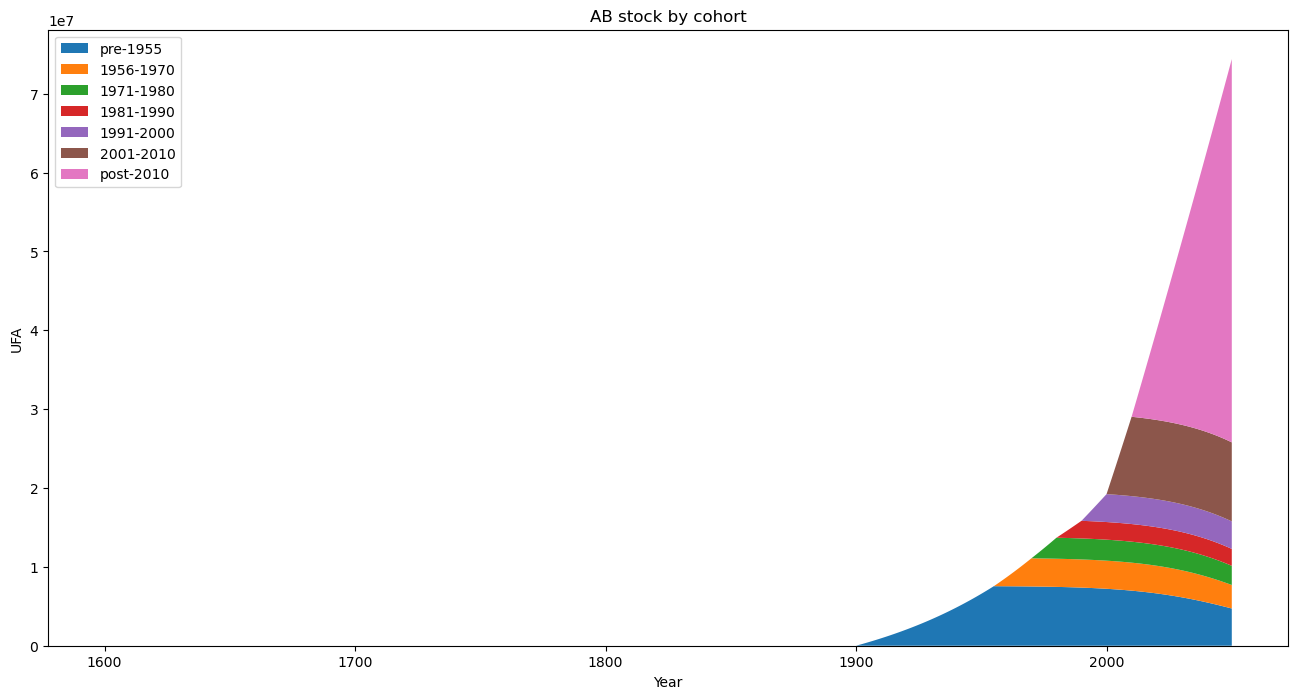

In [30]:
# This script visualizes the distribution of Useful Floor Area (UFA) stock 
# for Apartment Blocks (AB) by tabula cohort from 1600 to 2050.
plt.figure(figsize=(16, 8))

# Create a stacked area plot showing the distribution of UFA stock for 
# AB from 1600 to 2050.
# Each segment of the stack represents UFA stock from different construction 
# periods or cohorts.
plt.stackplot(
    np.arange(1600, 2051), 
    AB_UFA_stock_by_tabula_cohort.loc[:,'pre-1955'], 
    AB_UFA_stock_by_tabula_cohort.loc[:,'1956-1970'],
    AB_UFA_stock_by_tabula_cohort.loc[:,'1971-1980'],
    AB_UFA_stock_by_tabula_cohort.loc[:,'1981-1990'],
    AB_UFA_stock_by_tabula_cohort.loc[:,'1991-2000'],
    AB_UFA_stock_by_tabula_cohort.loc[:,'2001-2010'],
    AB_UFA_stock_by_tabula_cohort.loc[:,'post-2010'],
    labels=[
        'pre-1955', '1956-1970', '1971-1980', '1981-1990', '1991-2000', 
        '2001-2010', 'post-2010']
    )

plt.title('AB stock by cohort')
plt.xlabel('Year')
plt.legend(loc='upper left')
plt.ylabel('UFA')
plt.ylim(bottom=0)
plt.savefig(
    directory_path / 
    'visualizations/baseline/model_outputs/ab_ufa_stock_by_cohort.jpeg', 
    bbox_inches='tight')

### Plotting total stock change UFA

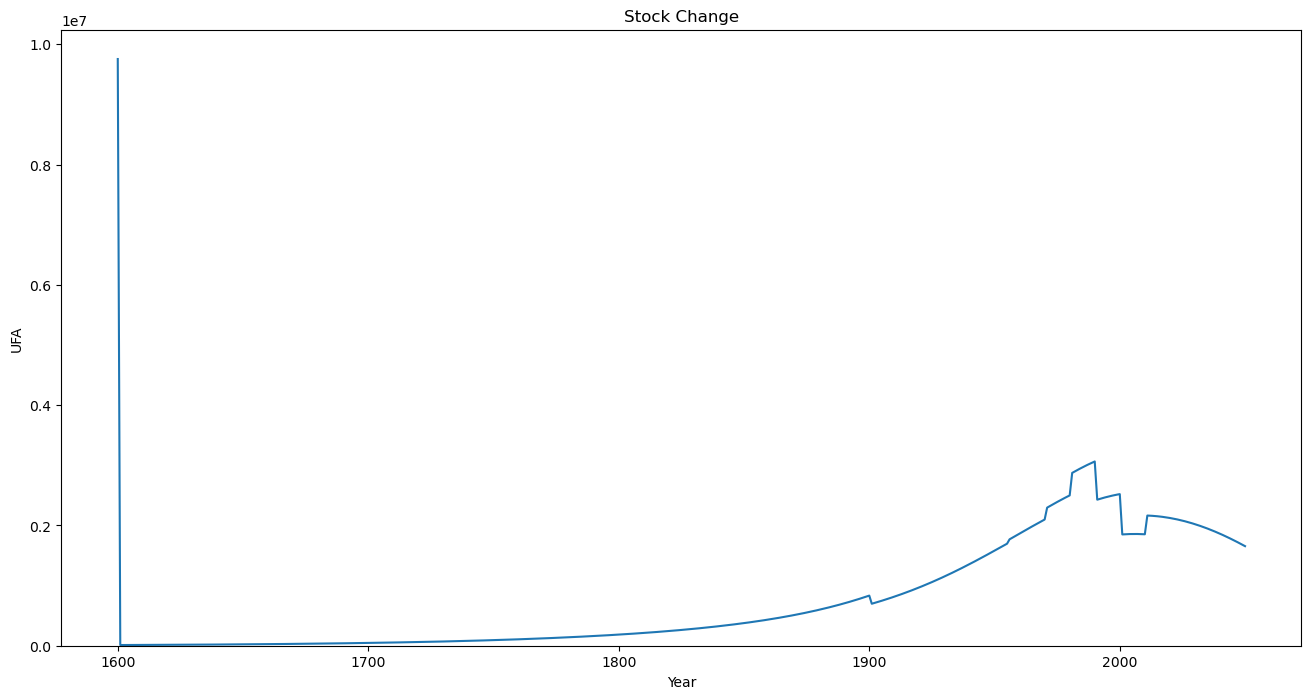

In [31]:
# Plotting UFA total stock change over the years 1600 to 2050.
plt.figure(figsize=(16, 8))
plt.plot(np.arange(1600, 2051), stock_change_total_UFA)
plt.title('Stock Change')
plt.xlabel('Year')
plt.ylabel('UFA')
plt.ylim(bottom=0)
plt.savefig(
    directory_path / 
    'visualizations/baseline/model_outputs/stock_change_total_ufa.jpeg', 
    bbox_inches='tight')

### Plotting stock UFA by Dwelling Type

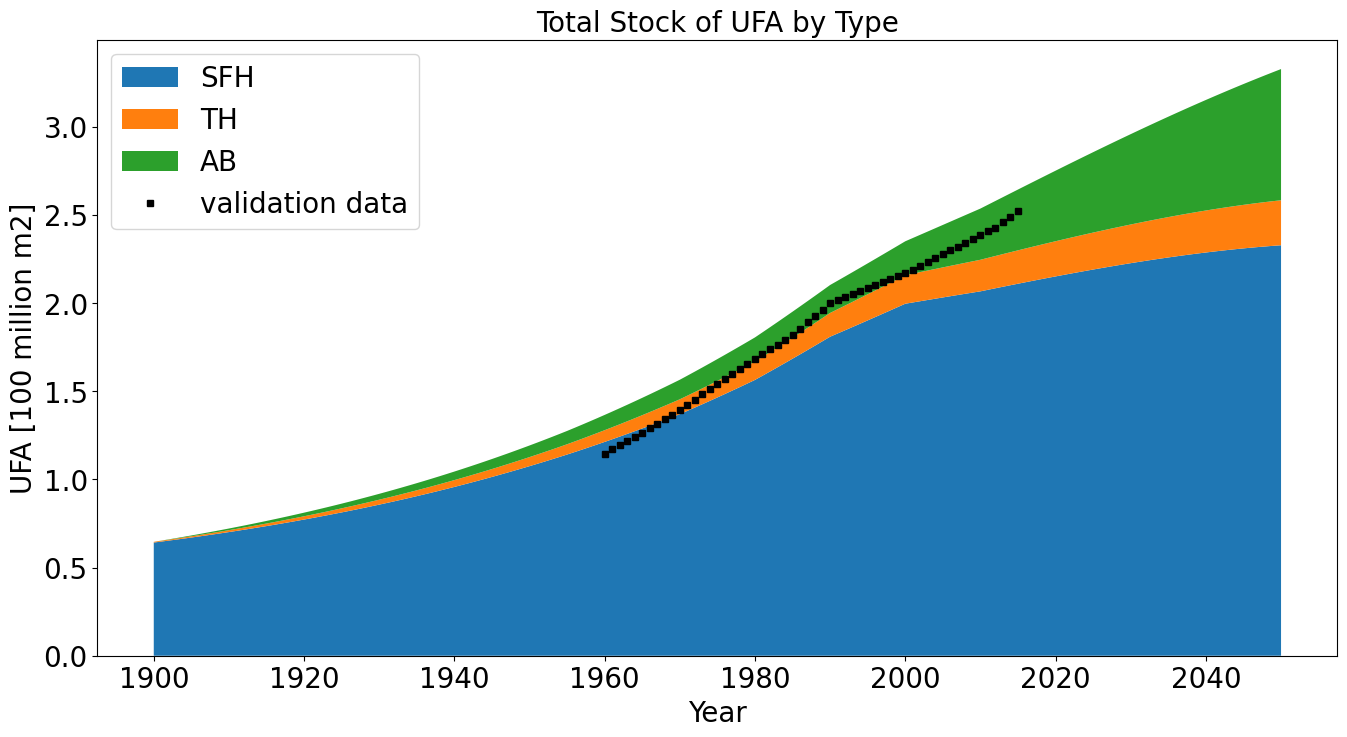

In [129]:
# This script creates a visual representation of the total stock of 
# Useful Floor Area (UFA) by different dwelling types over a time span 
# from 1900 to 2050. 
plt.figure(figsize=(16, 8))

# Create a stacked area plot to show the distribution of UFA by 
# dwelling types (SFH, TH, AB) from 1900 to 2050.
plt.stackplot(
    np.arange(1900, 2051), 
    s_UFA_c_SFH_df.loc['1900':'2050'].sum(axis=1)/100000000, 
    s_UFA_c_TH_df.loc['1900':'2050'].sum(axis=1)/100000000, 
    s_UFA_c_AB_df.loc['1900':'2050'].sum(axis=1)/100000000,
    labels=['SFH', 'TH', 'AB']
    )

# Overlay a plot showing validation data, scaled down by a factor of 100 
# for compatibility with other data scales.
plt.plot(
    UFA_stock_validation.index, UFA_stock_validation/100, 
    's', color = 'black', markersize = 5, label = f'validation data')

plt.title('Total Stock of UFA by Type', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.legend(loc='upper left', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('UFA [100 million m2]', fontsize=20)
plt.ylim(bottom=0)
plt.savefig(
    directory_path / 
    'visualizations/baseline/model_outputs/UFA_by_type.jpeg', 
    bbox_inches='tight')

### Plotting total stock by TABULA cohort

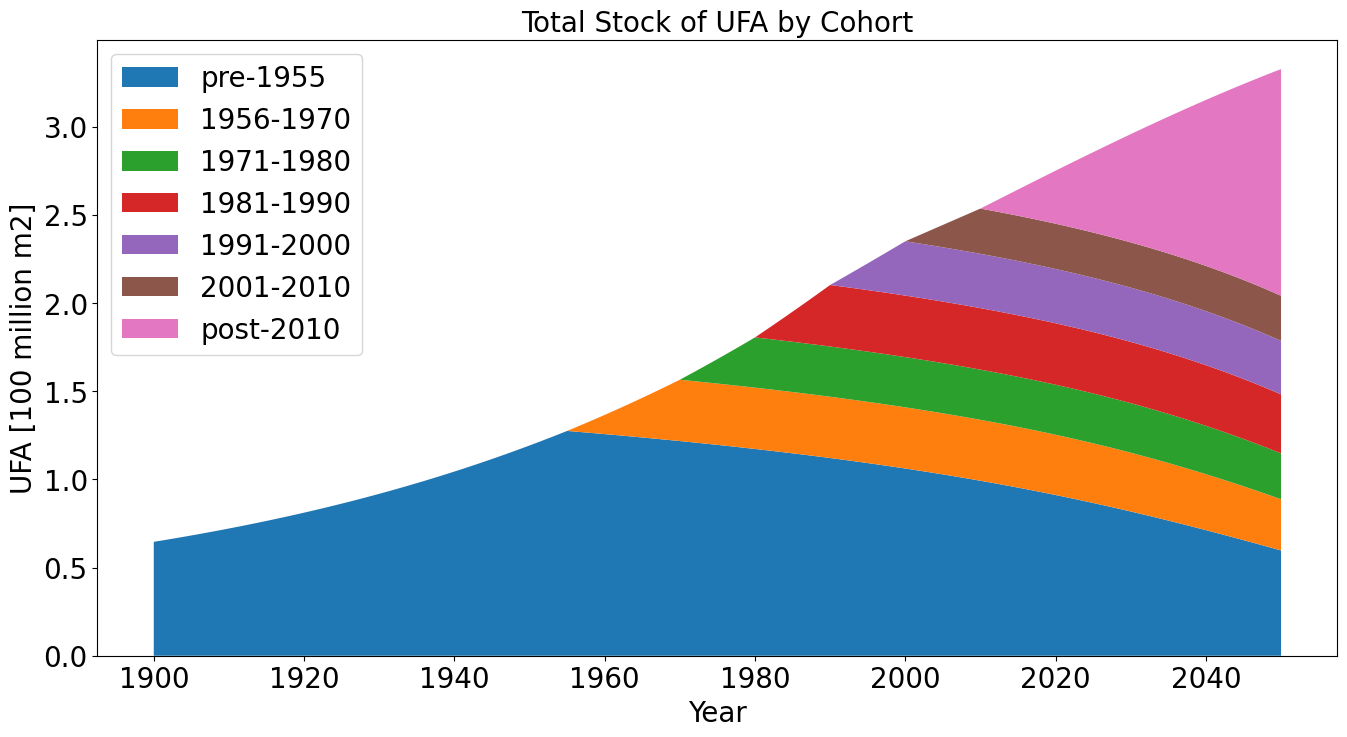

In [128]:
# The script creates a visualization that displays the evolution of the 
# total stock of Useful Floor Area (UFA) for various cohorts from 1900 to 2050.
plt.figure(figsize=(16, 8))

# Use stackplot function to plot cumulative areas representing the total 
# UFA of different cohorts over time from 1900 to 2050. 
plt.stackplot(
    np.arange(1900, 2051), 
    total_stock_UFA_by_tabula_cohort.loc['1900':'2050','pre-1955']/100000000, 
    total_stock_UFA_by_tabula_cohort.loc['1900':'2050','1956-1970']/100000000,
    total_stock_UFA_by_tabula_cohort.loc['1900':'2050','1971-1980']/100000000,
    total_stock_UFA_by_tabula_cohort.loc['1900':'2050','1981-1990']/100000000,
    total_stock_UFA_by_tabula_cohort.loc['1900':'2050','1991-2000']/100000000,
    total_stock_UFA_by_tabula_cohort.loc['1900':'2050','2001-2010']/100000000,
    total_stock_UFA_by_tabula_cohort.loc['1900':'2050','post-2010']/100000000,
    labels=[
        'pre-1955', '1956-1970', '1971-1980', '1981-1990', '1991-2000', 
        '2001-2010', 'post-2010']
    )

plt.title('Total Stock of UFA by Cohort', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.legend(loc='upper left', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('UFA [100 million m2]', fontsize=20)
plt.ylim(bottom=0)
plt.savefig(
    directory_path / 
    'visualizations/baseline/model_outputs/UFA_by_cohort.jpeg', 
    bbox_inches='tight')

### Plotting inflow by Dwelling Type

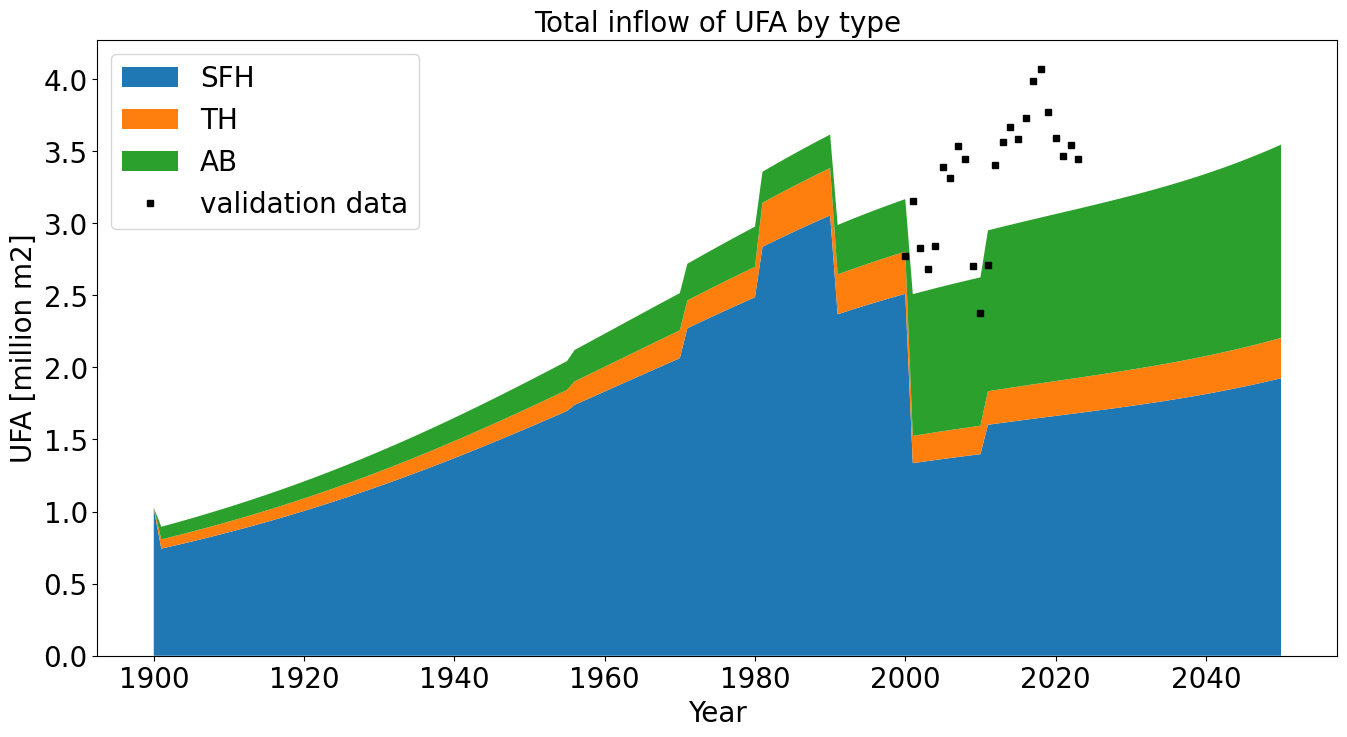

In [131]:
# The script creates a visual representation of the total inflow of 
# Useful Floor Area (UFA) by dwelling type (SFH, TH, AB) over time, 
# specifically from the year 1900 to 2050.
plt.figure(figsize=(16, 8))

# Create a stacked area plot for the inflow data of SFH, TH, and AB from 
# 1900 to 2050, converting the values to millions of square meters for 
# better readability.
plt.stackplot(
    np.arange(1900, 2051),
    i_SFH_UFA.loc['1900':'2050'].T/1000000, # transpose and scale down.
    i_TH_UFA.loc['1900':'2050'].T/1000000,
    i_AB_UFA.loc['1900':'2050'].T/1000000,
    labels=[
        'SFH', 'TH', 'AB']
    )

# Calculate total inflow for validation data across all types.
total_inflow_UFA_validation = UFA_inflow_validation.loc[
    :,'SFH'] + UFA_inflow_validation.loc[
        :,'TH'] + UFA_inflow_validation.loc[:,'AB']

# Plot the validation data using square markers, scaled down for consistency.
plt.plot(
    total_inflow_UFA_validation.index, total_inflow_UFA_validation/1000000, 
    's', color = 'black', markersize = 5, label = f'validation data')

plt.title('Total inflow of UFA by type', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.legend(loc='upper left', fontsize=20)
plt.ylabel('UFA [million m2]', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.ylim(bottom=0)
plt.savefig(
    directory_path / 
    'visualizations/baseline/model_outputs/total_inflow_by_type.jpeg', 
    bbox_inches='tight')

### Plotting total outflow UFA

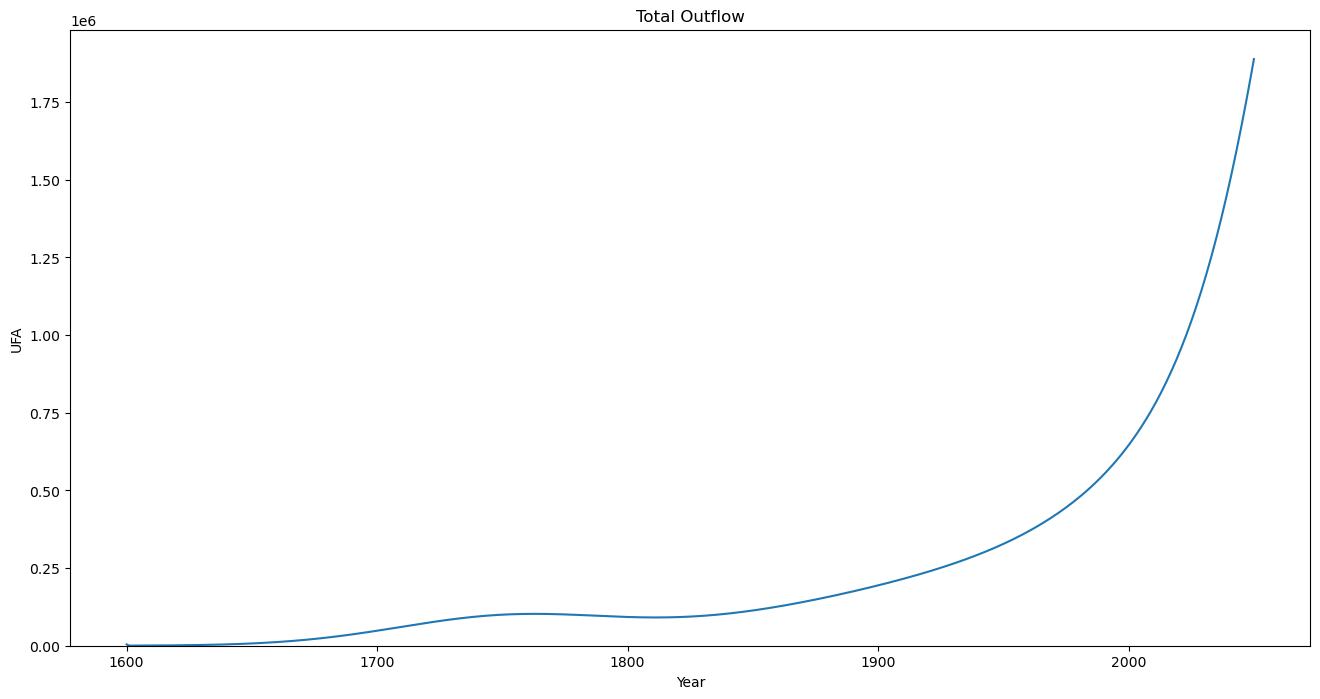

In [35]:
# Script that plots the total outflow of Useful Floor Area (UFA) across time
# from 1600 to 2050.
plt.figure(figsize=(16, 8))
plt.plot(np.arange(1600, 2051), o_total_UFA.sum(axis=1))
plt.title('Total Outflow')
plt.xlabel('Year')
plt.ylabel('UFA')
plt.ylim(bottom=0)
plt.savefig(
    directory_path / 
    'visualizations/baseline/model_outputs/outflow_total_ufa.jpeg', 
    bbox_inches='tight')

### Plotting total inflow UFA

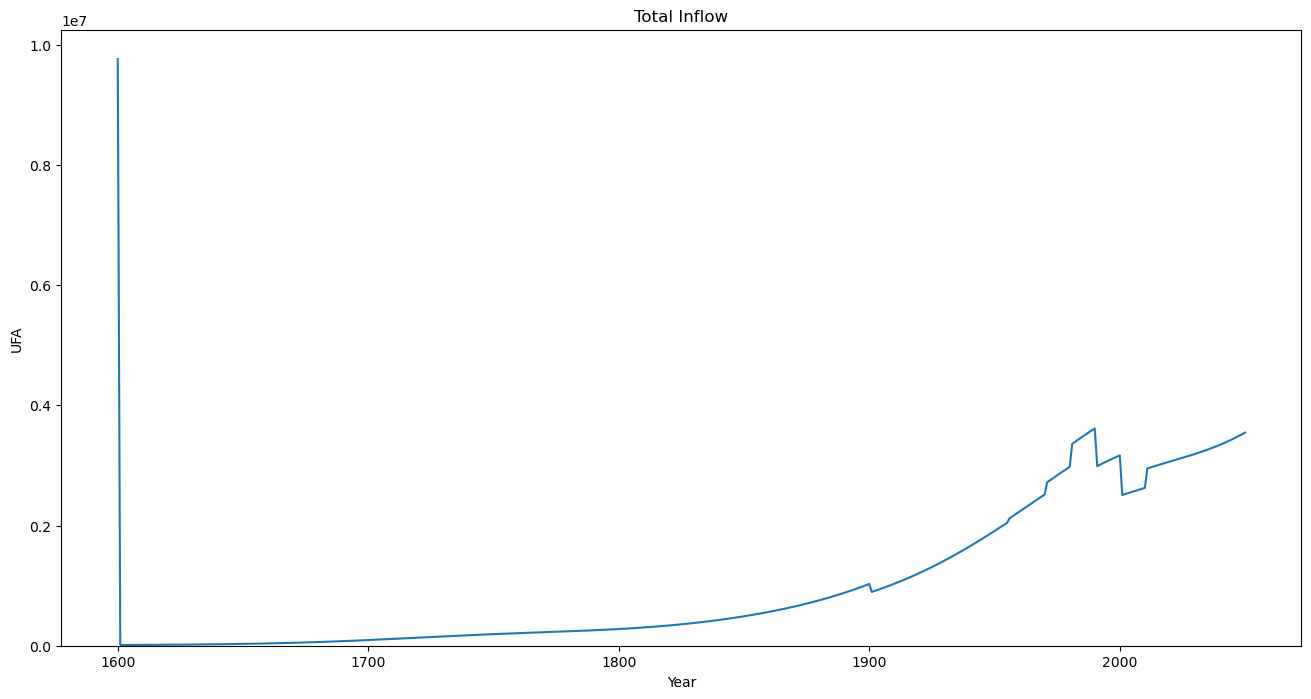

In [36]:
# Script that plots the total inflow of Useful Floor Area (UFA) across time
# from 1600 to 2050.
plt.figure(figsize=(16, 8))
plt.plot(np.arange(1600, 2051), i_total_UFA)
plt.title('Total Inflow')
plt.xlabel('Year')
plt.ylabel('UFA')
plt.ylim(bottom=0)
plt.savefig(
    directory_path / 
    'visualizations/baseline/model_outputs/inflow_total_ufa.jpeg', 
    bbox_inches='tight')

In [117]:
# Display energy use data for Single Family Homes (SFH) across various years 
# from 1600 to 2050. 
energy_use_SFH.loc['300':]

,0
300,1.405541e+10
301,1.417538e+10
302,1.429751e+10
303,1.442181e+10
304,1.454833e+10
...,...
446,3.279804e+10
447,3.274202e+10
448,3.268308e+10
449,3.262101e+10


### Plotting Energy use by Dwelling Type

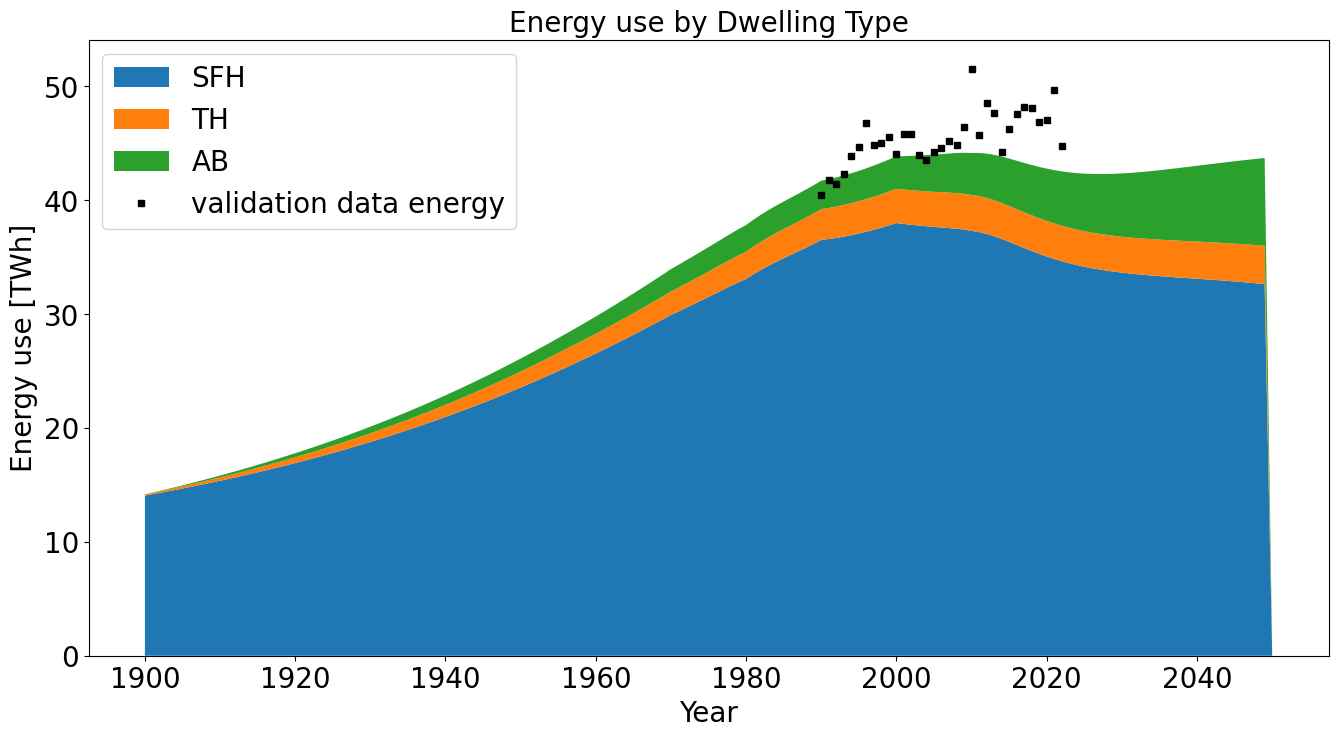

In [118]:
# This script plots the energy use by dwelling type over years
# from 1600 to 2050.
plt.figure(figsize=(16, 8))

# Plot the energy use data from SFH, TH, and AB from a starting index, 
# normalizing the values by converting them to TWh.
plt.stackplot(
    np.arange(1900, 2051), 
    energy_use_SFH.loc['300':].sum(axis=1)/1000000000, 
    energy_use_TH.loc['300':].sum(axis=1)/1000000000, 
    energy_use_AB.loc['300':].sum(axis=1)/1000000000,
    labels=['SFH', 'TH', 'AB']
    )

# Overlay validation data for comparison, scaled to TWh, and add markers.
plt.plot(
    energy_validation.index, energy_validation*0.001, 's', 
    color = 'black', markersize = 5, label = f'validation data energy')

plt.title('Energy use by Dwelling Type', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='upper left', fontsize=20)
plt.ylabel('Energy use [TWh]', fontsize=20)
plt.ylim(bottom=0)
plt.savefig(
    directory_path / 
    'visualizations/baseline/model_outputs/energy_by_type.jpeg', 
    bbox_inches='tight')

### Plotting Energy use by Cohort

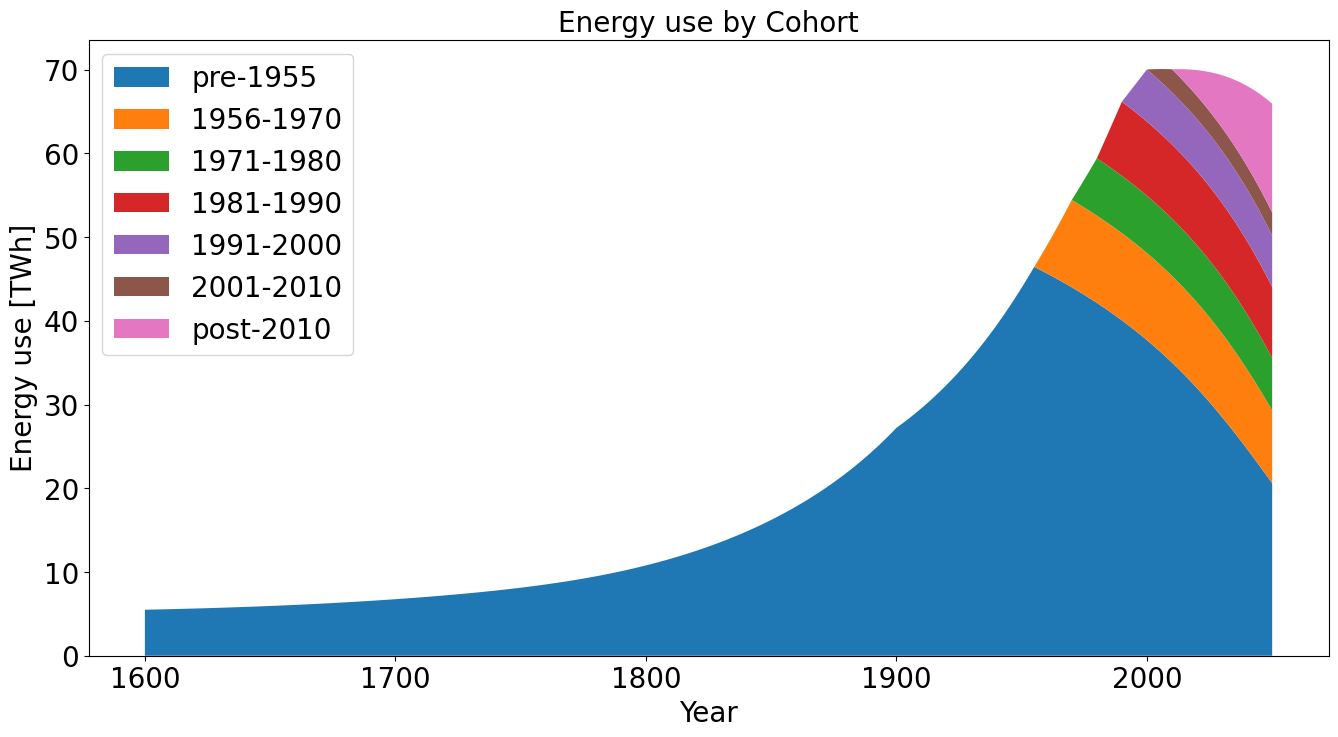

In [38]:
# This script plots the energy use by cohort over years from 1600 to 2050.
plt.figure(figsize=(16, 8))

# Create a stackplot to show the energy use over time for different cohorts.
plt.stackplot(
    np.arange(1600, 2051), 
    energy_use_matrix_total_tabula_cohort.loc[:,'pre-1955'], 
    energy_use_matrix_total_tabula_cohort.loc[:,'1956-1970'],
    energy_use_matrix_total_tabula_cohort.loc[:,'1971-1980'],
    energy_use_matrix_total_tabula_cohort.loc[:,'1981-1990'],
    energy_use_matrix_total_tabula_cohort.loc[:,'1991-2000'],
    energy_use_matrix_total_tabula_cohort.loc[:,'2001-2010'],
    energy_use_matrix_total_tabula_cohort.loc[:,'post-2010'],
    labels=[
        'pre-1955', '1956-1970', '1971-1980', '1981-1990', '1991-2000', 
        '2001-2010', 'post-2010']
    )

plt.title('Energy use by Cohort', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='upper left', fontsize=20)
plt.ylabel('Energy use [TWh]', fontsize=20)
plt.ylim(bottom=0)
plt.savefig(
    directory_path / 
    'visualizations/baseline/model_outputs/energy_by_cohort.jpeg', 
    bbox_inches='tight')

## Plotting Calibration vs Validation data

### Plotting Energy Calibration vs Validation

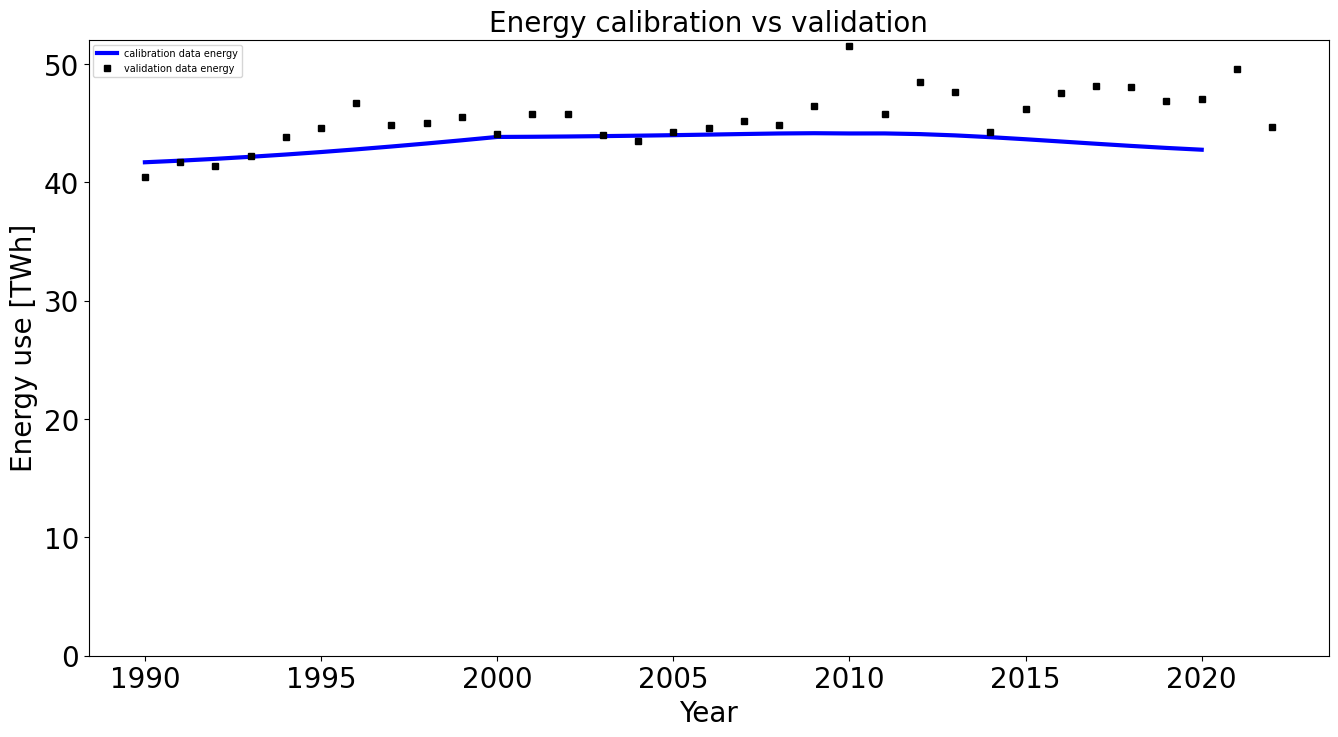

In [39]:
# The script plots the calibration data for energy use  against validation 
# data to compare the two.
plt.figure(figsize=(16, 8))

# Plot calibration data from the year 1990 to 2020. The data is normalized 
# and scaled for visualization.
plt.plot(
    np.arange(1990,2021), 
    total_energy_use.loc['390':'420']/1000000*0.001, color='blue', lw=3, 
    label = f'calibration data energy')

# Plot validation data as scatter points.
plt.plot(
    energy_validation.index, energy_validation*0.001, 's', 
    color = 'black', markersize = 5, label = f'validation data energy')
plt.legend(loc='upper left', fontsize=7)
plt.title('Energy calibration vs validation', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Energy use [TWh]', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(bottom=0)
plt.savefig(
    directory_path / 
    'visualizations/baseline/validation_vs_calibration/total_energy_use.jpeg', 
    bbox_inches='tight')

### Plotting Stock Calibration vs Validation splitted by dwelling type

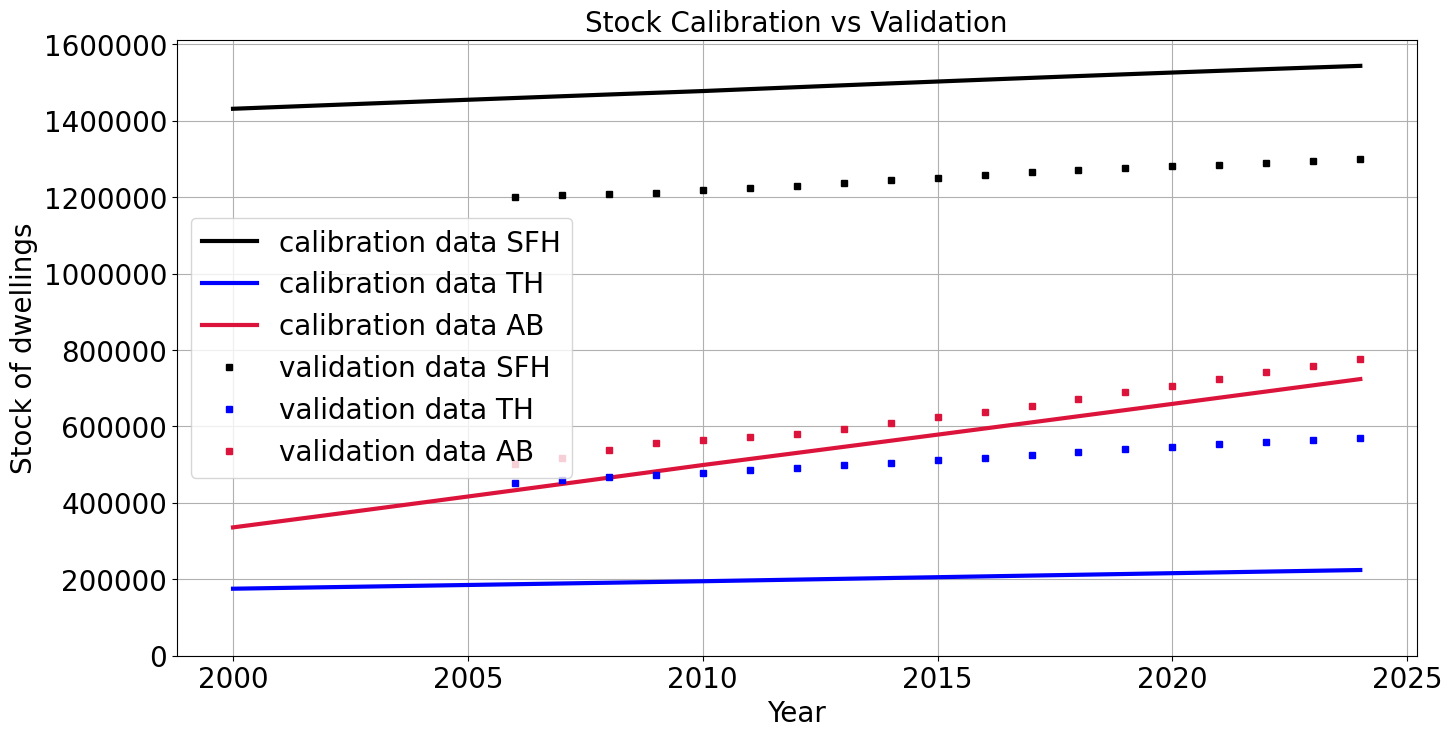

In [40]:
# The script plots the calibration data for stock (splitted by dwelling type) 
# against validation data to compare the two.

# Summarize the total stock data for SFH, TH, and AB across columns.
s_SFH_v = s_SFH_df.sum(axis=1)
s_TH_v = s_TH_df.sum(axis=1)
s_AB_v = s_AB_df.sum(axis=1)

plt.figure(figsize=(16, 8))

# Plot the calibration data from 2000 to 2024 with specific styling.
plt.plot(
    np.arange(2000,2025), s_SFH_v.loc['2000':'2024'], color='black', 
    lw=3, label = f'calibration data SFH')
plt.plot(
    np.arange(2000,2025), s_TH_v.loc['2000':'2024'], color='blue', 
    lw=3, label = f'calibration data TH')
plt.plot(
    np.arange(2000,2025), s_AB_v.loc['2000':'2024'], color='crimson', 
    lw=3, label = f'calibration data AB')

# Plot the validation data.
plt.plot(
    stock_validation.index, stock_validation.loc[:,'SFH'], 's', 
    color = 'black', markersize = 5, label = f'validation data SFH')
plt.plot(
    stock_validation.index, stock_validation.loc[:,'TH'], 's', 
    color = 'blue', markersize = 5, label = f'validation data TH')
plt.plot(
    stock_validation.index, stock_validation.loc[:,'AB'], 's', 
    color = 'crimson', markersize = 5, label = f'validation data AB')

plt.title('Stock Calibration vs Validation', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.legend(loc='best', fontsize=20)
plt.ylabel('Stock of dwellings', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(bottom=0)

# Disable scientific notation on the y-axis.
plt.gca().yaxis.set_major_formatter
(ticker.ScalarFormatter(useMathText=False))
plt.gca().ticklabel_format(axis='y', style='plain')

# Enable grid for better readability.
plt.grid(True)
plt.savefig(
    directory_path / 
    'visualizations/baseline/validation_vs_calibration/stock_by_type.jpeg', 
    bbox_inches='tight')

### Plotting Stock Calibration vs Validation

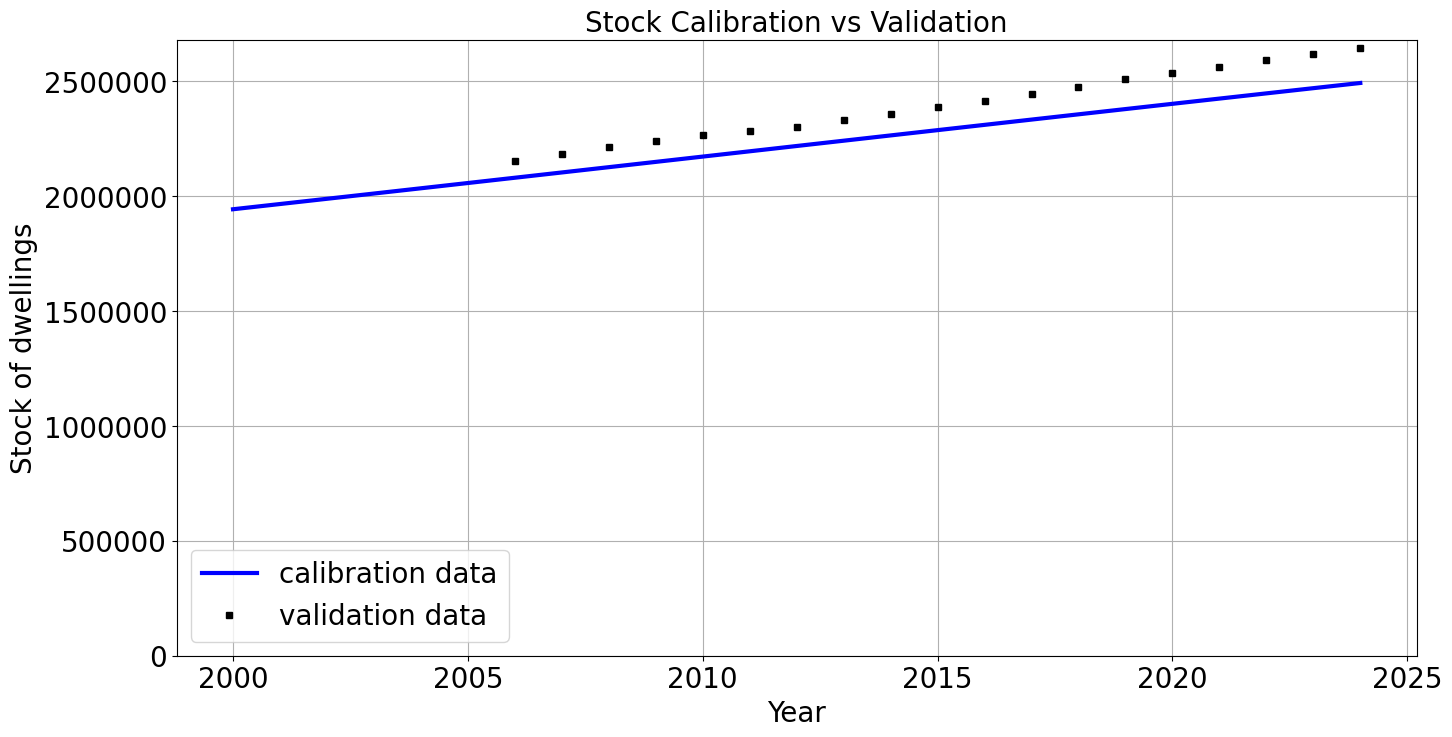

In [41]:
# The script plots the calibration data for stock against validation data 
# to compare the two.

# Sum the stock data for SFH, TH, and AB across columns to get total 
# stock for calibration data.
s_SFH_v = s_SFH_df.sum(axis=1)
s_TH_v = s_TH_df.sum(axis=1)
s_AB_v = s_AB_df.sum(axis=1)
total_stock_calibration = s_SFH_v + s_TH_v + s_AB_v

# Sum the validation data for SFH, TH, and AB to get total stock for 
# validation data.
total_stock_validation = stock_validation.loc[
    :,'SFH'] + stock_validation.loc[:,'TH'] + stock_validation.loc[
        :,'AB']

plt.figure(figsize=(16, 8))

# Plot the calibration data for total stock from 2000 to 2024 with 
# specific styling.
plt.plot(
    np.arange(2000,2025), total_stock_calibration.loc['2000':'2024'], 
    color='blue', lw=3, label = f'calibration data')

# Plot the validation data for total stock.
plt.plot(
    total_stock_validation.index, total_stock_validation, 's', 
    color = 'black', markersize = 5, label = f'validation data')

plt.title('Stock Calibration vs Validation', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.legend(loc='lower left', fontsize=20)
plt.ylabel('Stock of dwellings', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(bottom=0)

# Disable scientific notation on the y-axis.
plt.gca().yaxis.set_major_formatter
(ticker.ScalarFormatter(useMathText=False))
plt.gca().ticklabel_format(axis='y', style='plain')

# Enable grid for better readability.
plt.grid(True)
plt.savefig(
directory_path / 
'visualizations/baseline/validation_vs_calibration/stock_by_type.jpeg', 
    bbox_inches='tight')

### Plotting Inflow Calibration vs Validation splitted by dwelling type

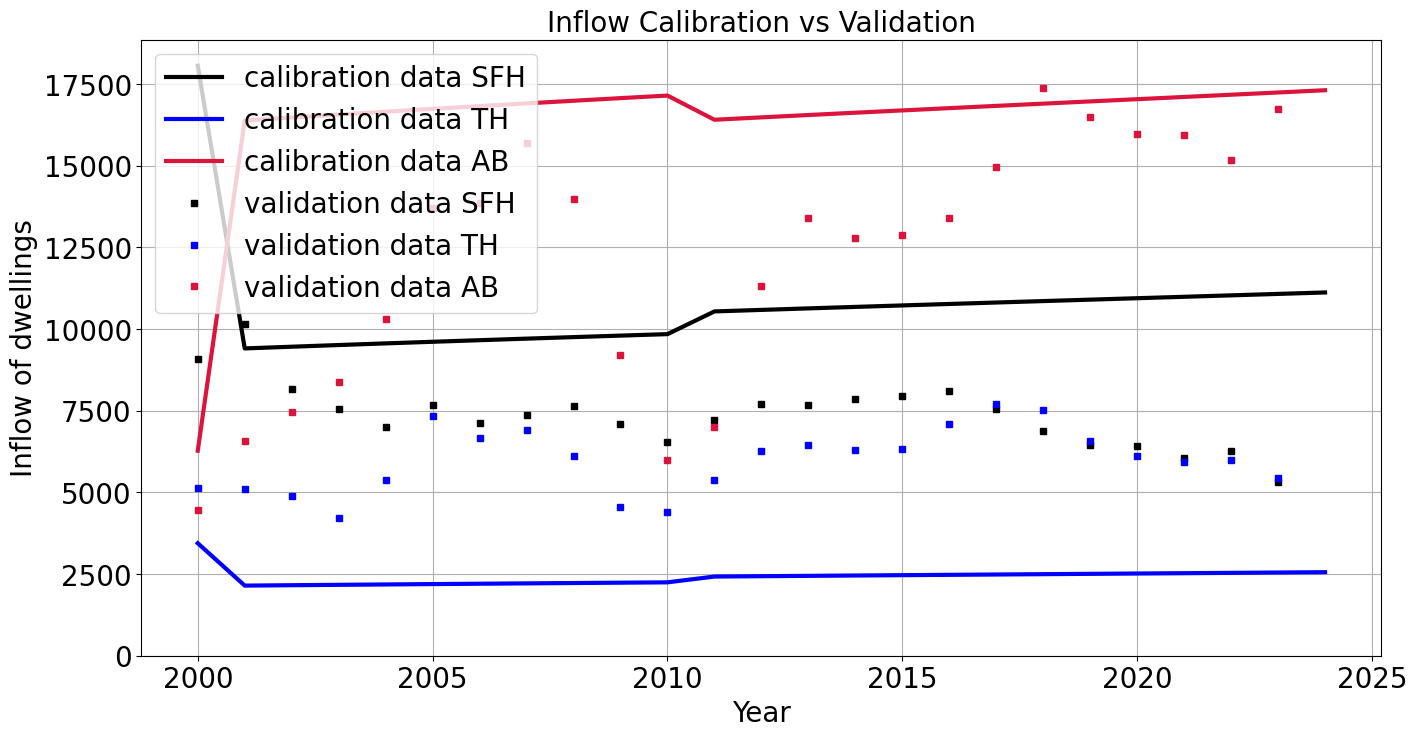

In [42]:
# The script plots the calibration data for inflows (splitted by dwelling type) 
# against validation data to compare the two.
plt.figure(figsize=(16, 8))

# Plotting inflow calibration data from 2000 to 2024 with specific styling.
plt.plot(
    np.arange(2000,2025), i_SFH.loc['2000':'2024'], color='black', 
    lw=3, label = f'calibration data SFH')
plt.plot(
    np.arange(2000,2025), i_TH.loc['2000':'2024'], color='blue', 
    lw=3, label = f'calibration data TH')
plt.plot(
    np.arange(2000,2025), i_AB.loc['2000':'2024'], color='crimson', 
    lw=3, label = f'calibration data AB')

# Plotting inflow validation data.
plt.plot(
    np.arange(2000,2024), inflow_validation.loc[:,'SFH'], 's', 
    color = 'black', markersize = 5, label = f'validation data SFH')
plt.plot(
    np.arange(2000,2024), inflow_validation.loc[:,'TH'], 's', 
    color = 'blue', markersize = 5, label = f'validation data TH')
plt.plot(
    np.arange(2000,2024), inflow_validation.loc[:,'AB'], 's', 
    color = 'crimson', markersize = 5, label = f'validation data AB')

plt.title('Inflow Calibration vs Validation', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.legend(loc='best', fontsize=20)
plt.ylabel('Inflow of dwellings', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(bottom=0)
plt.grid(True)
plt.savefig(
    directory_path / 
    'visualizations/baseline/validation_vs_calibration/inflow_by_type.jpeg', 
    bbox_inches='tight')

In [43]:
# Calculate the total inflow by summing the inflow arrays from SFH, TH, AB.
total_inflow_calibration = i_SFH.values + i_TH.values + i_AB.values

# Convert the summed inflow values into a pandas DataFrame and set the 
# year range as the index.
total_inflow_calibration = pd.DataFrame(
    total_inflow_calibration, index=np.arange(1600,2051))

# Display the DataFrame to view the total inflows from 1600 to 2050.
total_inflow_calibration

,0
1600,73618.578087
1601,88.691810
1602,90.132405
1603,91.604721
1604,93.109851
...,...
2046,34412.202704
2047,34621.481526
2048,34836.687496
2049,35057.866415


### Plotting Inflow Calibration vs Validation 

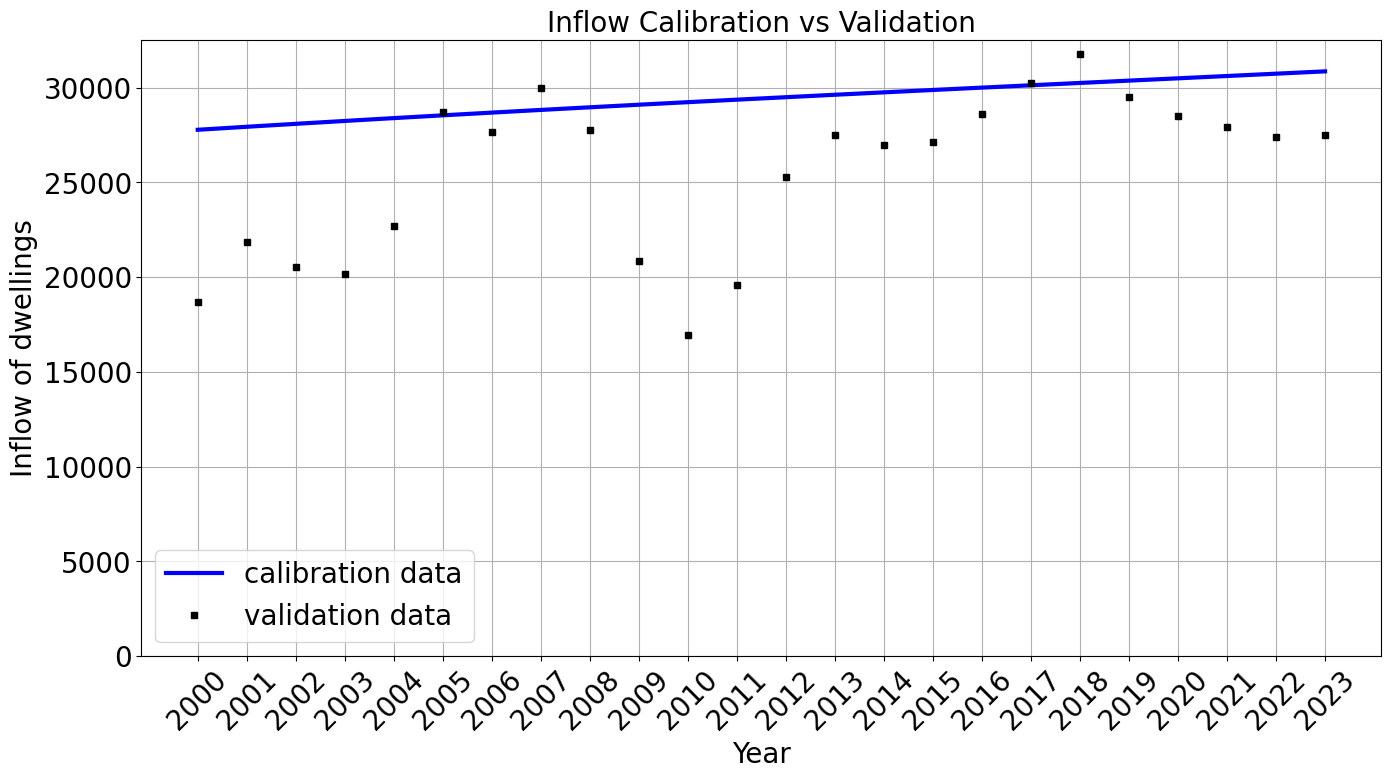

In [44]:
# The script plots the calibration data for inflows against validation 
# data to compare the two.

# Sum up the inflow data across different dwelling types for validation data.
total_inflow_validation = inflow_validation.loc[
    :,'SFH'] + inflow_validation.loc[:,'TH'] + inflow_validation.loc[
        :,'AB']

# Calculate total inflow from calibration data by summing inflows from 
# SFH, TH, and AB arrays.
total_inflow_calibration = i_SFH.values + i_TH.values + i_AB.values

# Convert the total calibration inflow data into a DataFrame and set the 
# index to years from 1600 to 2050.
total_inflow_calibration = pd.DataFrame(
    total_inflow_calibration, index=np.arange(1600,2051))

# Plot the total inflow calibration data for the years 2000 to 2023.
plt.figure(figsize=(16, 8))
plt.plot(inflow_validation.index, 
         total_inflow_calibration.loc['2000':'2023'], color='blue', 
         lw=3, label = f'calibration data')

# Plot the total inflow validation data.
plt.plot(inflow_validation.index, total_inflow_validation, 's', 
         color = 'black', markersize = 5, label = f'validation data')

plt.title('Inflow Calibration vs Validation', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.legend(loc='best', fontsize=20)
plt.ylabel('Inflow of dwellings', fontsize=20)
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(bottom=0)
plt.grid(True)
plt.savefig(
    directory_path / 
    'visualizations/baseline/validation_vs_calibration/inflow_total.jpeg', 
    bbox_inches='tight')

### Plotting Outflow Calibration vs Validation splitted by dwelling type

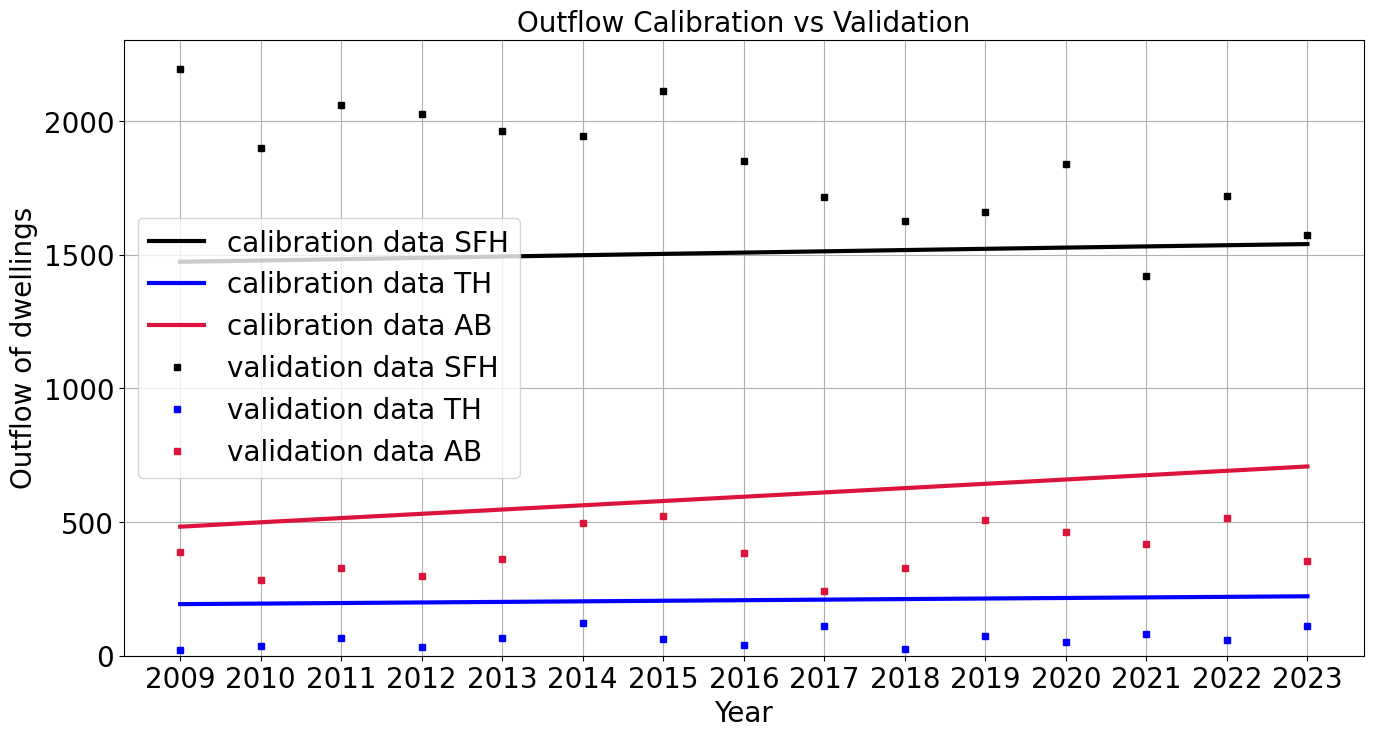

In [45]:
# The script plots the calibration data for outflows (splitted by dwelling type) 
# against validation data to compare the two.

# Calculating the total outflows for SFH, TH, AB by summing and scaling down.
o_SFH_v = s_SFH_df.sum(axis=1)/1000
o_TH_v = s_TH_df.sum(axis=1)/1000
o_AB_v = s_AB_df.sum(axis=1)/1000

# Plotting the calibration data for SFH, TH, AB with a line graph.
plt.figure(figsize=(16, 8))
plt.plot(
    outflow_validation.index, o_SFH_v.loc['2009':'2023'], color='black',
    lw=3, label = f'calibration data SFH')
plt.plot(
    outflow_validation.index, o_TH_v.loc['2009':'2023'], color='blue', 
    lw=3, label = f'calibration data TH')
plt.plot(
    outflow_validation.index, o_AB_v.loc['2009':'2023'], 
    color='crimson', lw=3, label = f'calibration data AB')

# Plotting the validation data for SFH, TH, AB using scatter points.
plt.plot(
    outflow_validation.index, 
    outflow_validation.loc[:,'Single Family House (SFH)'], 's', 
    color = 'black', markersize = 5, label = f'validation data SFH')
plt.plot(
    outflow_validation.index, 
    outflow_validation.loc[:,'Terraced House (TH)'], 's', 
    color = 'blue', markersize = 5, label = f'validation data TH')
plt.plot(
    outflow_validation.index, 
    outflow_validation.loc[:,'Apartment Block (AB)'], 's', 
    color = 'crimson', markersize = 5, label = f'validation data AB')

plt.title('Outflow Calibration vs Validation', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.legend(loc='best', fontsize=20)
plt.ylabel('Outflow of dwellings', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(bottom=0)
plt.grid(True)
plt.savefig(
    directory_path / 
    'visualizations/baseline/validation_vs_calibration/outflow_by_type.jpeg', 
    bbox_inches='tight')

### Plotting Outflow Calibration vs Validation

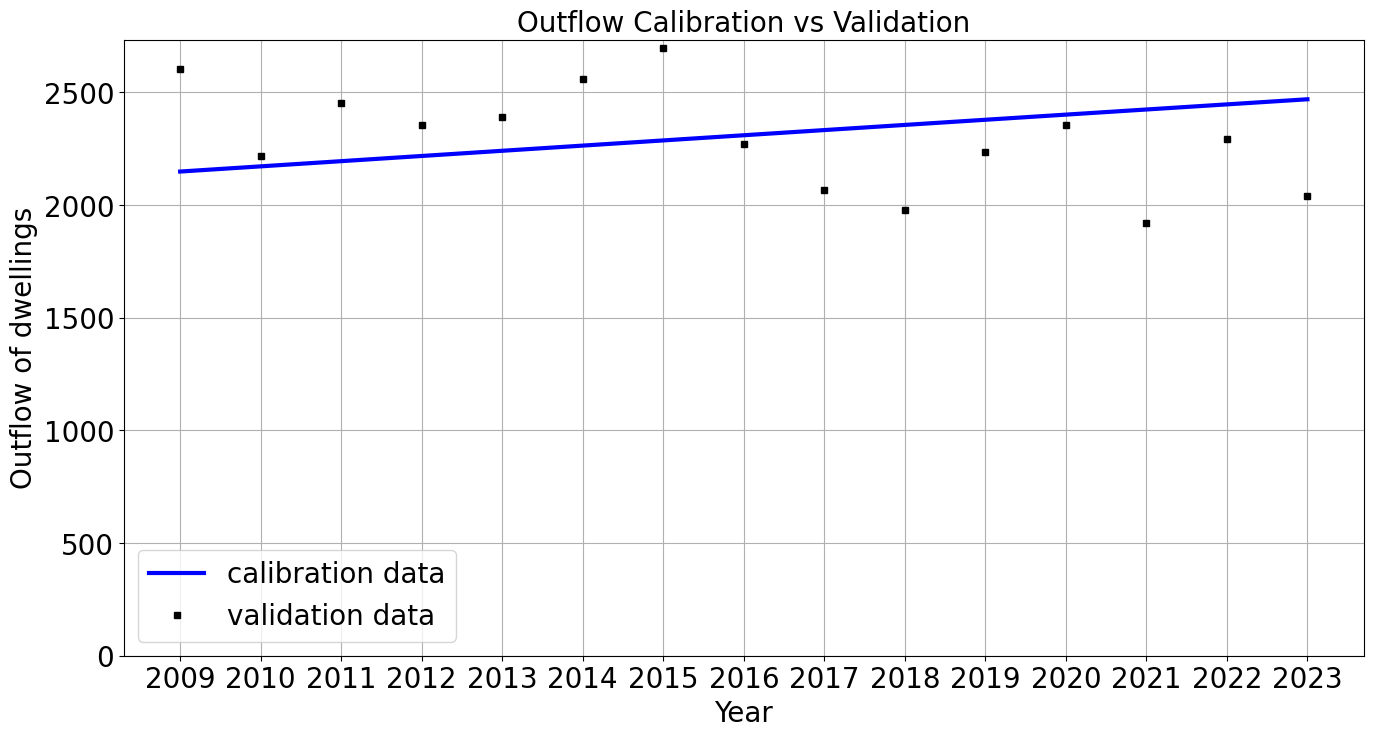

In [46]:
# The script plots the calibration data for outflows against validation 
# data to compare the two.

# Preparing outflow data for validation by summing up outflow values for 
# each dwelling type and scaling down by 1000.
o_SFH_v = s_SFH_df.sum(axis=1)/1000
o_TH_v = s_TH_df.sum(axis=1)/1000
o_AB_v = s_AB_df.sum(axis=1)/1000

# Calculating the total outflow for calibration data by summing the 
# scaled values across all dwelling types.
total_outflow_calibration = o_SFH_v + o_TH_v + o_AB_v

# Calculating the total outflow for validation data by summing the values 
# for all dwelling types from the validation dataset.
total_outflow_validation = outflow_validation.loc[
    :,'Single Family House (SFH)'] + outflow_validation.loc[
        :,'Terraced House (TH)'] + outflow_validation.loc[
            :,'Apartment Block (AB)']
plt.figure(figsize=(16, 8))

# Plotting the calibration data from 2009 to 2023 as a line graph.
plt.plot(
    outflow_validation.index, 
    total_outflow_calibration.loc['2009':'2023'], color='blue', lw=3, 
    label = f'calibration data')

# Plotting the validation data as scatter points.
plt.plot(
    outflow_validation.index, 
    total_outflow_validation, 's', color = 'black', markersize = 5, 
    label = f'validation data')

plt.title('Outflow Calibration vs Validation', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.legend(loc='lower left', fontsize=20)
plt.ylabel('Outflow of dwellings', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(bottom=0)
plt.grid(True)
plt.savefig(
    directory_path / 
    'visualizations/baseline/validation_vs_calibration/outflow_total.jpeg', 
    bbox_inches='tight')

how to make 3d plots: https://www.educba.com/pandas-3d-dataframe/

### Plotting Total stock of UFA Calibration vs Validation

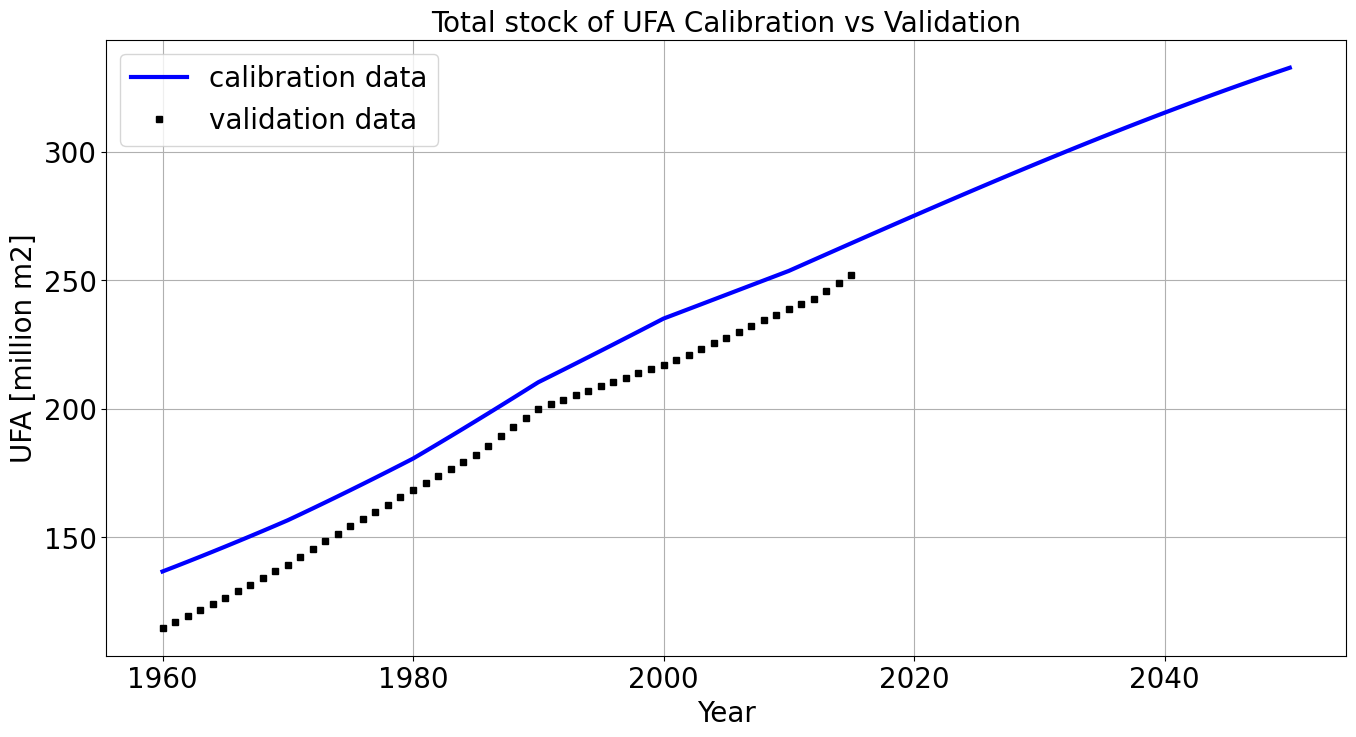

In [47]:
# The script plots the calibration data for total stock of UFA against 
# validation data to compare the two.
plt.figure(figsize=(16, 8))

# Plot the calibration data for total stock of UFA from 1960 to 2050. 
# The data is scaled down to million square meters.
plt.plot(
    np.arange(1960,2051), 
    total_stock_UFA_by_tabula_cohort.sum(
        axis=1).loc['1960':'2050']/1000000, 
    color = 'blue', lw = 3, label = f'calibration data')

# Plot the validation data for total stock of UFA, represented as 
# scatter points. 
plt.plot(
    UFA_stock_validation.index, UFA_stock_validation, 
    's', color = 'black', markersize = 5, label = f'validation data')


plt.title('Total stock of UFA Calibration vs Validation', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.legend(loc='upper left', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('UFA [million m2]', fontsize=20)
plt.grid(True)


### Plotting Outflow of UFA Calibration vs Validation

(0.0, 2626334.1417696686)

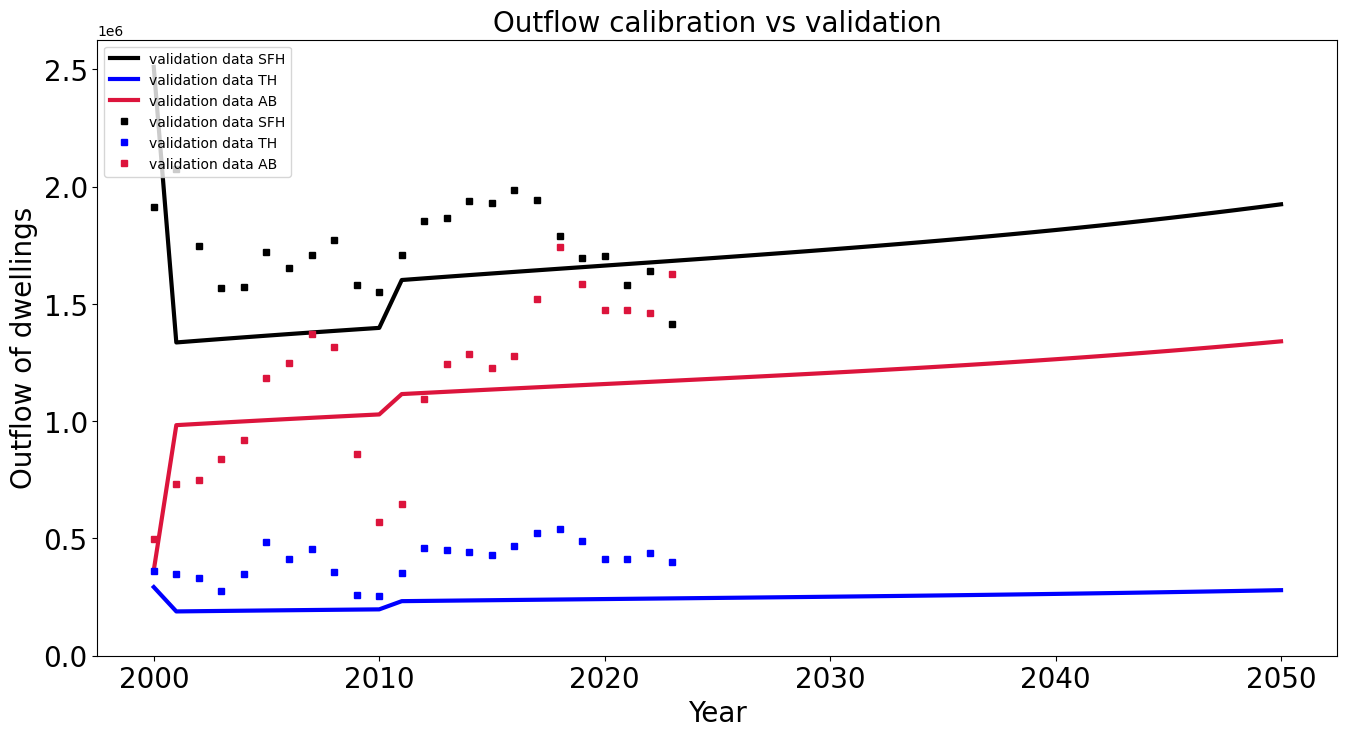

In [48]:
# The script plots the calibration data for UFA outflows (splitted by dwelling 
# type) against validation data to compare the two.
plt.figure(figsize=(16, 8))

# Plot the calibration data for SFH, TH, AB from 2000 to 2050.
plt.plot(
    np.arange(2000,2051), i_SFH_UFA.loc['2000':'2050'], lw=3, 
    color = 'black', label = f'validation data SFH')
plt.plot(
    np.arange(2000,2051), i_TH_UFA.loc['2000':'2050'], lw=3, 
    color = 'blue', label = f'validation data TH')
plt.plot(
    np.arange(2000,2051), i_AB_UFA.loc['2000':'2050'], lw=3, 
    color = 'crimson', label = f'validation data AB')

# Plot the validation data for SFH, TH, AB.
plt.plot(UFA_inflow_validation.index, 
         UFA_inflow_validation.loc[:,'SFH'], 's', color = 'black', 
         markersize = 5, label = f'validation data SFH')
plt.plot(UFA_inflow_validation.index, 
         UFA_inflow_validation.loc[:,'TH'], 's', color = 'blue', 
         markersize = 5, label = f'validation data TH')
plt.plot(UFA_inflow_validation.index, 
         UFA_inflow_validation.loc[:,'AB'], 's', color = 'crimson', 
         markersize = 5, label = f'validation data AB')

plt.title('Inflow calibration vs validation', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.legend(loc='upper left', fontsize=10)
plt.ylabel('Inflow UFA', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(bottom=0)

In [49]:
# Display the inflow data for Useful Floor Area (UFA) for Single Family 
# Homes (SFH), indexed by year from 1600 to 2050.
i_SFH_UFA

,SFH
Year,
1600,9.699886e+06
1601,1.168591e+04
1602,1.187573e+04
1603,1.206972e+04
1604,1.226803e+04
...,...
2046,1.877028e+06
2047,1.888443e+06
2048,1.900181e+06


In [50]:
# Calculate the total inflow of Useful Floor Area (UFA) for all 
# dwelling types (SFH, TH, AB) for each year from 1600 to 2050.
total_inflow_UFA_calibration = i_SFH_UFA.loc[:,'SFH'] + i_TH_UFA.loc[
    :,'TH'] + i_AB_UFA.loc[:,'AB']
total_inflow_UFA_calibration

Year
1600    9.760351e+06
1601    1.175876e+04
1602    1.194975e+04
1603    1.214495e+04
1604    1.234450e+04
            ...     
2046    3.456843e+06
2047    3.477866e+06
2048    3.499485e+06
2049    3.521703e+06
2050    3.544523e+06
Length: 451, dtype: float64

### Plotting Outflow of UFA Calibration vs Validation

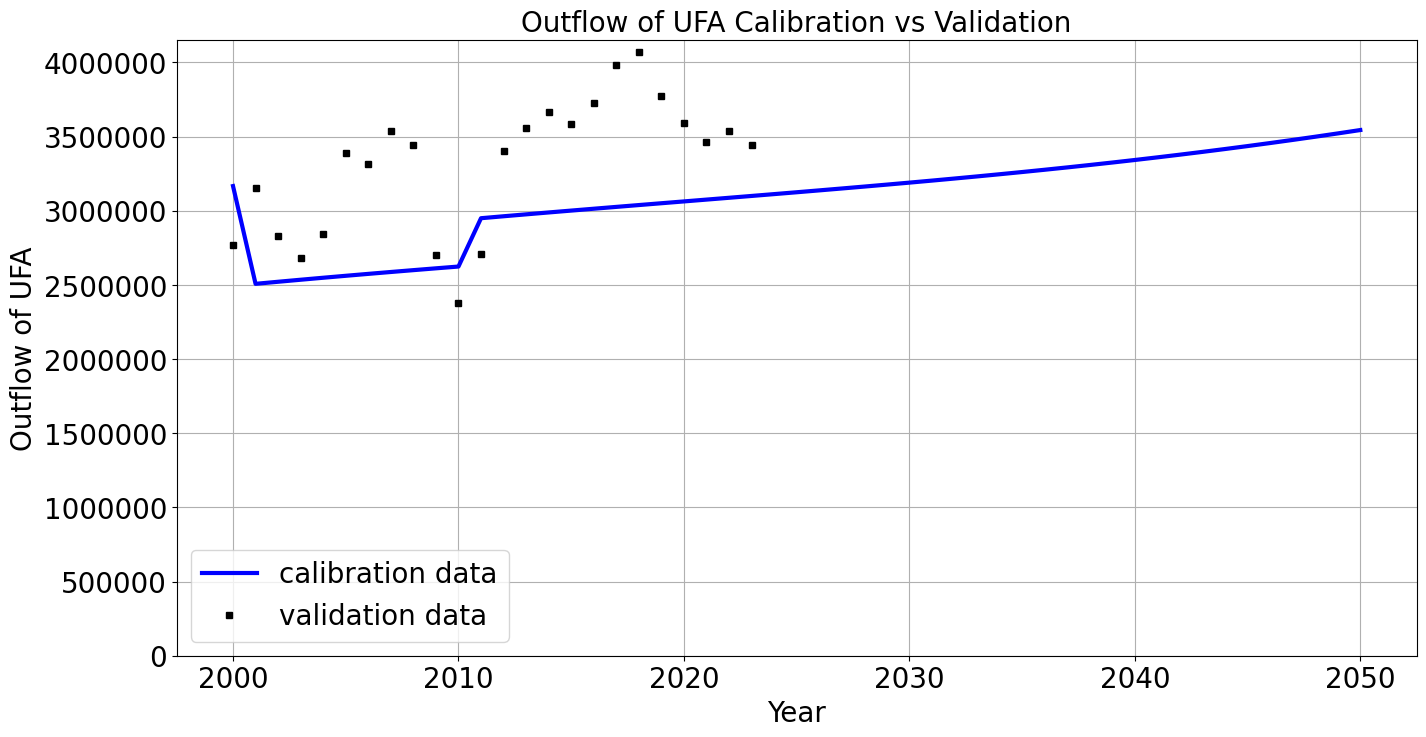

In [51]:
# The script plots the calibration data for UFA outflows against 
# validation data to compare the two.

# Combine the inflow data for SFH, TH, and AB to create a total inflow 
# data series for the calibration data.
total_inflow_UFA_calibration = i_SFH_UFA.loc[:,'SFH'] + i_TH_UFA.loc[
    :,'TH'] + i_AB_UFA.loc[:,'AB']

# Similarly, combine the inflow validation data across all dwelling 
# types to create a total inflow validation series.
total_inflow_UFA_validation = UFA_inflow_validation.loc[
    :,'SFH'] + UFA_inflow_validation.loc[
        :,'TH'] + UFA_inflow_validation.loc[:,'AB']

plt.figure(figsize=(16, 8))

# Plot the calibration data from 2000 to 2050.
plt.plot(
    np.arange(2000,2051), 
    total_inflow_UFA_calibration.loc['2000':'2050'], color='blue', 
    lw=3, label = f'calibration data')

# Plot the validation data from 2000 to 2050.
plt.plot(
    total_inflow_UFA_validation.index, total_inflow_UFA_validation, 
    's', color = 'black', markersize = 5, label = f'validation data')

plt.title('Inflow of UFA Calibration vs Validation', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.legend(loc='best', fontsize=20)
plt.ylabel('Inflow of UFA', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(bottom=0)

# Disable scientific notation on the y-axis.
plt.gca().yaxis.set_major_formatter
(ticker.ScalarFormatter(useMathText=False))
plt.gca().ticklabel_format(axis='y', style='plain')
plt.grid(True)
plt.savefig(
    directory_path / 
    'visualizations/baseline/validation_vs_calibration/outflow_total.jpeg', 
    bbox_inches='tight')

### Carbon emission validation

In [52]:
# Convert total carbon emissions value, located at row 390 and column 0, 
# from grams to metric tons.
total_carbon_emissions.loc[390,0]*0.001/1000

6647.278825464473

### Total carbon emissions

In [53]:
# Convert total carbon emissions value, located at row 449 and column 0, 
# from grams to metric tons.
total_carbon_emissions.loc[449,0]*0.001/1000

6546.46852407089

### Plotting Emissions by Dwelling Type

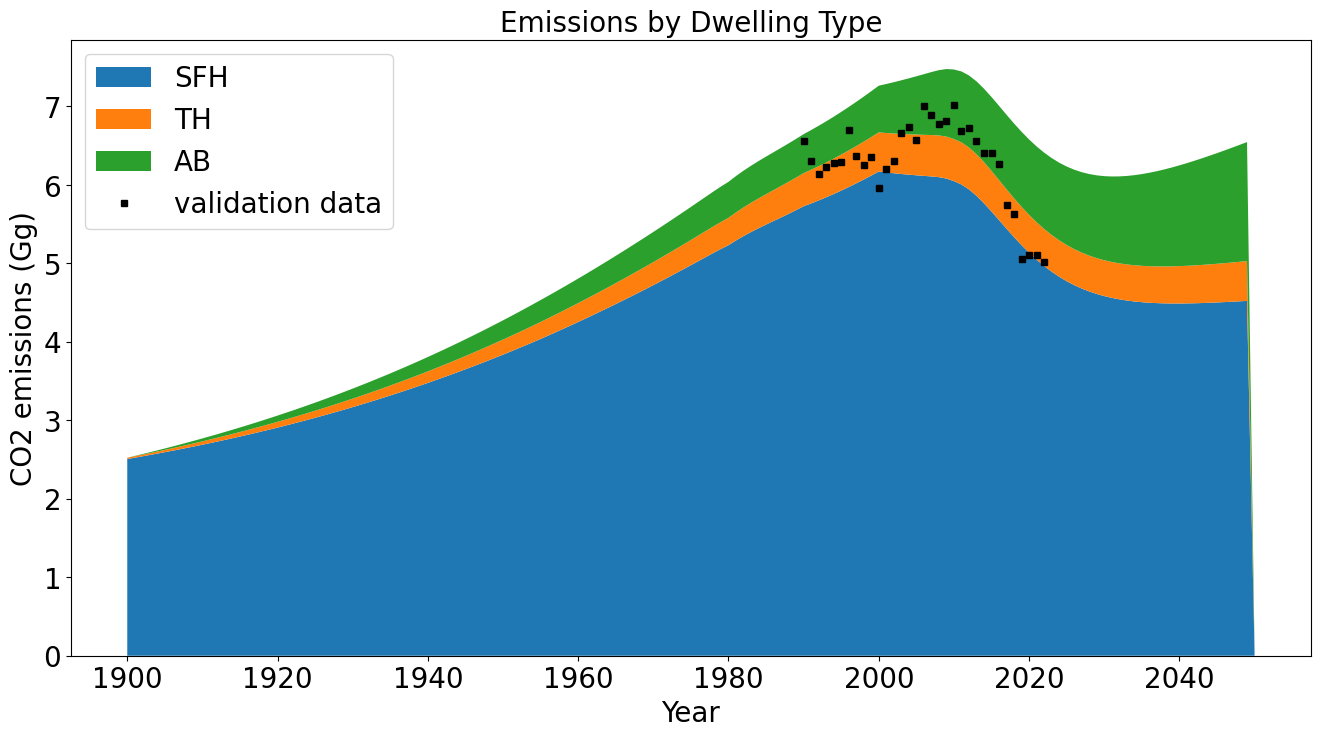

In [120]:
# This script creates a visualization showing how carbon emissions vary 
# over time for different dwelling types, alongside validation data points.
plt.figure(figsize=(16, 8))

# Create a stacked area plot, where emissions for different dwelling types 
# are stacked on top of each other. Sum up emissions over time 
# and convert them from grams to gigagrams.
plt.stackplot(
    np.arange(1900, 2051), 
    carbon_emissions_SFH.loc['300':].sum(axis=1)/1000000000, 
    carbon_emissions_TH.loc['300':].sum(axis=1)/1000000000, 
    carbon_emissions_AB.loc['300':].sum(axis=1)/1000000000,
    labels=['SFH', 'TH', 'AB']
    )

# Plot validation data.
plt.plot(
    carbon_emissions_validation.index, carbon_emissions_validation*0.001, 's', 
    color = 'black', markersize = 5, label = f'validation data')

plt.title('Emissions by Dwelling Type', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='upper left', fontsize=20)
plt.ylabel('CO2 emissions (Gg)', fontsize=20)
plt.ylim(bottom=0)
plt.savefig(
    directory_path / 
    'visualizations/baseline/model_outputs/emissions_by_type.jpeg', 
    bbox_inches='tight')

In [135]:
# Retrieve the data for row 390.
total_carbon_emissions.loc[390]

0    6.647279e+09
Name: 390, dtype: float64

In [136]:
# # Retrieve the data for row 449.
total_carbon_emissions.loc[449]

0    6.546469e+09
Name: 449, dtype: float64

### Plotting Carbon Emissions calibration vs validation

(0.0, 7.600051269285489)

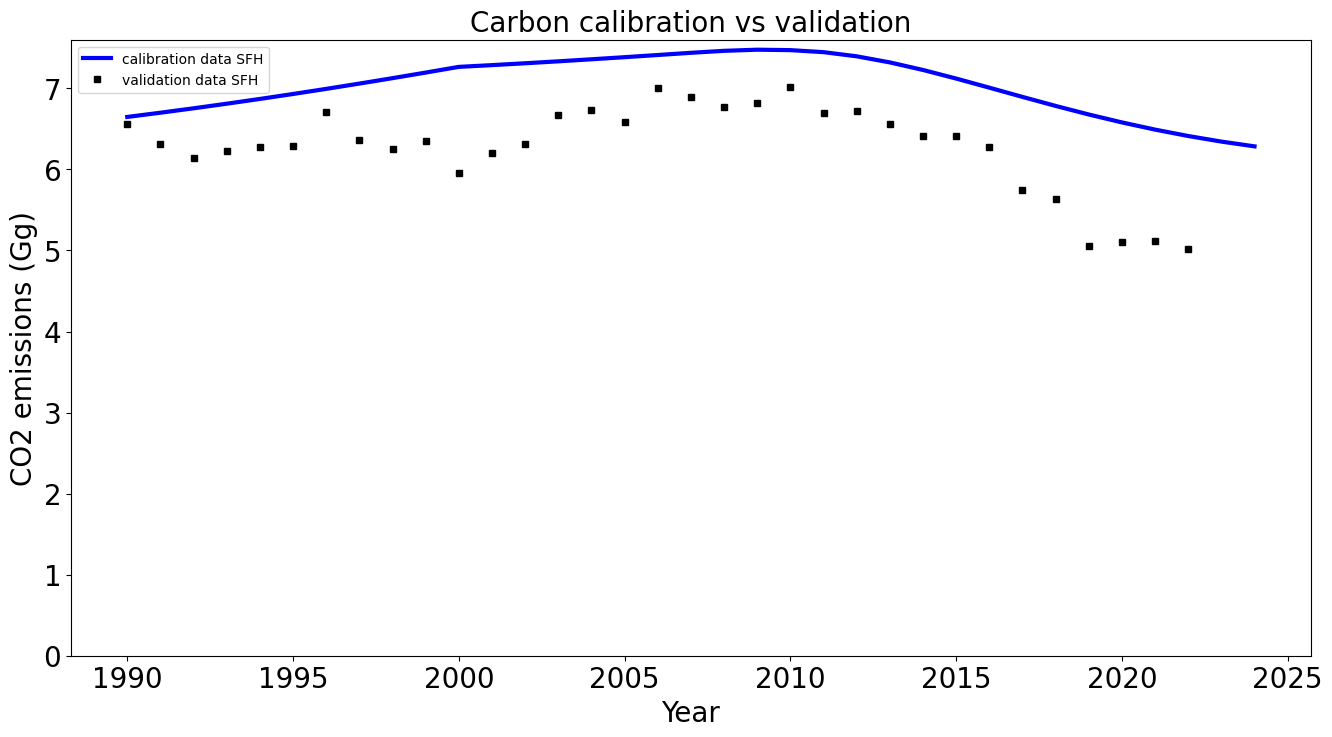

In [54]:
# The script plots the calibration data for carbon emissions against 
# validation data to compare the two.
plt.figure(figsize=(16, 8))

# Plot calibration data for carbon emissions, converted to Gg, 
# from 1990 to 2024.
plt.plot(
    np.arange(1990,2025), 
    total_carbon_emissions.loc['390':'424']*0.001/1000*0.001, 
    lw=3, color = 'blue', label = f'calibration data')

# Plot validation data for carbon emissions, converted to Gg.
plt.plot(
    carbon_emissions_validation.index, 
    carbon_emissions_validation*0.001, 's', color = 'black', 
    markersize = 5, label = f'validation data')

plt.title('Carbon calibration vs validation', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.legend(loc='upper left', fontsize=10)
plt.ylabel('CO2 emissions (Gg)', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(bottom=0)